# REPORT FOR ANALYZING AND PREDICTING TYPES OF CAT USING MACHINE LEARNING




**Author: Đoàn Quốc Kiên**

In this Colab, I will depict in detail the process to build the model with the best performance in analyzing observations and predicting potential cyber-attack types (or Cat in short).



Structure of my report:



Huge TITLE texts (aside from the capitalized title above) are for describing major steps of the data analysis using Machine Learning.



**Bold** texts with dash (-) indicate the smaller but still key tasks to complete the steps mentioned above.



*Italic* text with dash (-) describe smaller, broken-down actions in the tasks in order to better demonstrate the steps



Other text are purely description/explanation for the above or below steps, tasks or actions

#Initialize Code + Import Data

In [1]:
!pip install imblearn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/258.3 kB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 5.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, classification_report

from imblearn.over_sampling import RandomOverSampler



df = pd.read_csv('/kaggle/input/iotdata/IoT Network Intrusion Dataset.csv')


## Preprocess Data

In this step, I combine basic knowledge I have learnt (handling null values, duplicates, encoding data, etc.) along with my own implementation and encoding on some features that cannot be encoded normally

**- Drop unnecessary columns**



Timestamp and Sub_Cat is clearly meaningless in processing data, so I drop this in advance

In [3]:
df = df.drop(['Flow_ID', 'Src_IP', 'Dst_IP','Timestamp','Sub_Cat'], axis = 1)

df

Src_Port  Dst_Port  Protocol  Flow_Duration  Tot_Fwd_Pkts  \
0          10000     10101        17             75             1   
1           2179       554         6           5310             1   
2          52727      9020         6            141             0   
3          52964      9020         6            151             0   
4          36763      1900        17            153             2   
...          ...       ...       ...            ...           ...   
625778     56112      8043        17            277             1   
625779      4570       554         6           1658             0   
625780     52739      9020         6             77             1   
625781      9020     49784         6            240             2   
625782     10000     10101        17            198             2   

        Tot_Bwd_Pkts  TotLen_Fwd_Pkts  TotLen_Bwd_Pkts  Fwd_Pkt_Len_Max  \
0                  1            982.0           1430.0            982.0   
1                  2              0.0              0.0              0.0   
2                  3              0.0           2806.0              0.0   
3                  2              0.0           2776.0              0.0   
4                  1            886.0            420.0            452.0   
...              ...              ...              ...              ...   
625778             1             18.0             18.0             18.0   
625779             2              0.0              0.0              0.0   
625780             1              0.0              0.0              0.0   
625781             1           2776.0           1388.0           1388.0   
625782             1           2860.0           1430.0           1430.0   

        Fwd_Pkt_Len_Min  ...  Active_Mean  Active_Std  Active_Max  Active_Min  \
0                 982.0  ...          0.0         0.0         0.0         0.0   
1                   0.0  ...          0.0         0.0         0.0         0.0   
2                   0.0  ...          0.0         0.0         0.0         0.0   
3                   0.0  ...          0.0         0.0         0.0         0.0   
4                 434.0  ...          0.0         0.0         0.0         0.0   
...                 ...  ...          ...         ...         ...         ...   
625778             18.0  ...          0.0         0.0         0.0         0.0   
625779              0.0  ...          0.0         0.0         0.0         0.0   
625780              0.0  ...          0.0         0.0         0.0         0.0   
625781           1388.0  ...          0.0         0.0         0.0         0.0   
625782           1430.0  ...          0.0         0.0         0.0         0.0   

        Idle_Mean     Idle_Std  Idle_Max  Idle_Min    Label     Cat  
0            75.0     0.000000      75.0      75.0  Anomaly   Mirai  
1          2655.0  2261.327486    4254.0    1056.0  Anomaly     DoS  
2            70.5     0.707107      71.0      70.0  Anomaly    Scan  
3           151.0     0.000000     151.0     151.0  Anomaly   Mirai  
4            76.5     0.707107      77.0      76.0  Anomaly   Mirai  
...           ...          ...       ...       ...      ...     ...  
625778      277.0     0.000000     277.0     277.0  Anomaly   Mirai  
625779     1658.0     0.000000    1658.0    1658.0  Anomaly     DoS  
625780       77.0     0.000000      77.0      77.0  Anomaly    Scan  
625781      120.0     7.071068     125.0     115.0   Normal  Normal  
625782       99.0    32.526912     122.0      76.0  Anomaly   Mirai  

[625783 rows x 81 columns]

**- Handling NaN value**



Null or NaN value here is formally represent by the number -1, or the value inf, so I convert all of them to NaN first, and then explicitly handling them with various processes

*- Set all inf and -1 value to NaN*


In [4]:
df.replace([np.inf, -np.inf, -1], np.nan, inplace=True)

*- Drop features with too much (over 10%) NaN values*

In [5]:
for(column) in df.columns:

  if((df[column].isna().sum()) / len(df[column]) > 0.1):

    df = df.drop(column, axis = 1)

    print(column)


Init_Fwd_Win_Byts
Init_Bwd_Win_Byts


*- Drop observating that still contain NaN values.*



Since this dataset is very large, after this step, there are still a reasonable amount of data to work with

In [6]:
print(df.isna().sum().to_string())

df.dropna(inplace = True)

Src_Port               0
Dst_Port               0
Protocol               0
Flow_Duration          0
Tot_Fwd_Pkts           0
Tot_Bwd_Pkts           0
TotLen_Fwd_Pkts        0
TotLen_Bwd_Pkts        0
Fwd_Pkt_Len_Max        0
Fwd_Pkt_Len_Min        0
Fwd_Pkt_Len_Mean       0
Fwd_Pkt_Len_Std        0
Bwd_Pkt_Len_Max        0
Bwd_Pkt_Len_Min        0
Bwd_Pkt_Len_Mean       0
Bwd_Pkt_Len_Std        0
Flow_Byts/s          368
Flow_Pkts/s          368
Flow_IAT_Mean          0
Flow_IAT_Std           0
Flow_IAT_Max           0
Flow_IAT_Min           0
Fwd_IAT_Tot            0
Fwd_IAT_Mean           0
Fwd_IAT_Std            0
Fwd_IAT_Max            0
Fwd_IAT_Min            0
Bwd_IAT_Tot            0
Bwd_IAT_Mean           0
Bwd_IAT_Std            0
Bwd_IAT_Max            0
Bwd_IAT_Min            0
Fwd_PSH_Flags          0
Bwd_PSH_Flags          0
Fwd_URG_Flags          0
Bwd_URG_Flags          0
Fwd_Header_Len         0
Bwd_Header_Len         0
Fwd_Pkts/s             0
Bwd_Pkts/s             0




**- Remove duplicates**

In [7]:
df.drop_duplicates(keep=False, inplace=True)

**- Count and list all types of CAT**



This is here to show how imbalance the target after observations is. It will be useful for future attempt to oversampling

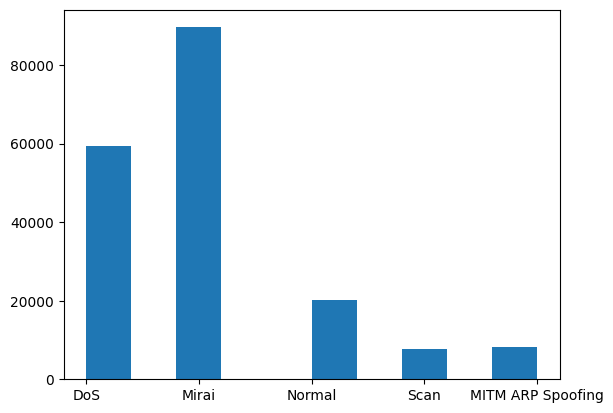

In [8]:
plt.hist(df['Cat'])

plt.show()

**- Encode CATs and labels**



Using simple label encoding, since CAT is the target and the 'labels' column only contain 2 values

In [9]:
CAT_to_num = {'Mirai' : 1, 'DoS' : 2, 'Scan' : 3, 'Normal' : 4, 'MITM ARP Spoofing' : 5}

df['Cat'] = df['Cat'].map(CAT_to_num)

df['Cat'].unique()



df['Label'] = (df['Label'] == 'Anomaly').astype(int)

df['Label'].unique()

array([1, 0])

In [10]:
df.head()

Src_Port  Dst_Port  Protocol  Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  \
1      2179       554         6           5310             1             2   
3     52964      9020         6            151             0             2   
4     36763      1900        17            153             2             1   
5     41980       443         6            157             2             1   
6     60175      8899        17            139            20             1   

   TotLen_Fwd_Pkts  TotLen_Bwd_Pkts  Fwd_Pkt_Len_Max  Fwd_Pkt_Len_Min  ...  \
1              0.0              0.0              0.0              0.0  ...   
3              0.0           2776.0              0.0              0.0  ...   
4            886.0            420.0            452.0            434.0  ...   
5              0.0              0.0              0.0              0.0  ...   
6            640.0             32.0             32.0             32.0  ...   

   Active_Mean  Active_Std  Active_Max  Active_Min  Idle_Mean     Idle_Std  \
1          0.0         0.0         0.0         0.0    2655.00  2261.327486   
3          0.0         0.0         0.0         0.0     151.00     0.000000   
4          0.0         0.0         0.0         0.0      76.50     0.707107   
5          0.0         0.0         0.0         0.0      78.50     6.363961   
6          0.0         0.0         0.0         0.0       6.95     1.669384   

   Idle_Max  Idle_Min  Label  Cat  
1    4254.0    1056.0      1    2  
3     151.0     151.0      1    1  
4      77.0      76.0      1    1  
5      83.0      74.0      1    1  
6      10.0       4.0      1    1  

[5 rows x 79 columns]

**- Check relevances between each information with the information need to classify**



This step is crucial, telling us what data is useful, and what is not. Using histograms to check the relevances between each feature with the target, we can remove some of the useless feature to optimize our code

*- Create an alt_df to encoding all of the data using simple label encoding.*



 Since no calculation is made in this version of our dataframe, it is safe to perform this type of encoding to simplify our data

In [11]:
#Create an alternate version which marked by unique id to facilitate data visualization

alt_df = df.copy()

for label in alt_df.columns[:-2]:

  mp = {val: i for i, val in enumerate(alt_df[label].unique())}

  alt_df[label] = alt_df[label].map(mp)

In [12]:
alt_df.head()

Src_Port  Dst_Port  Protocol  Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  \
1         0         0         0              0             0             0   
3         1         1         0              1             1             0   
4         2         2         1              2             2             1   
5         3         3         0              3             2             1   
6         4         4         1              4             3             1   

   TotLen_Fwd_Pkts  TotLen_Bwd_Pkts  Fwd_Pkt_Len_Max  Fwd_Pkt_Len_Min  ...  \
1                0                0                0                0  ...   
3                0                1                0                0  ...   
4                1                2                1                1  ...   
5                0                0                0                0  ...   
6                2                3                2                2  ...   

   Active_Mean  Active_Std  Active_Max  Active_Min  Idle_Mean  Idle_Std  \
1            0           0           0           0          0         0   
3            0           0           0           0          1         1   
4            0           0           0           0          2         2   
5            0           0           0           0          3         3   
6            0           0           0           0          4         4   

   Idle_Max  Idle_Min  Label  Cat  
1         0         0      1    2  
3         1         1      1    1  
4         2         2      1    1  
5         3         3      1    1  
6         4         4      1    1  

[5 rows x 79 columns]

*- Simple Oversampling for the alternate dataframe alt_df.*



This will be used to display correlations between the features and the target

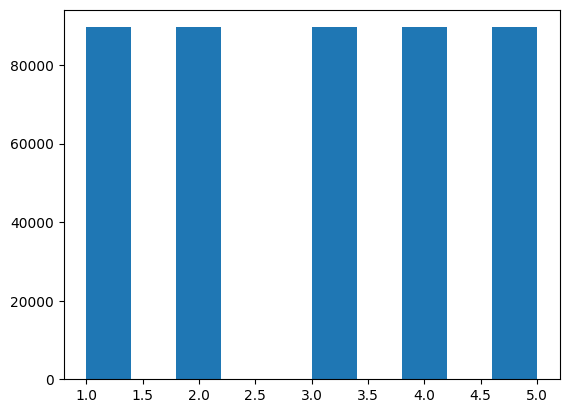

In [13]:
ros = RandomOverSampler()

alt_df, y_resampled = ros.fit_resample(alt_df, alt_df.iloc[:, -1])

alt_df = pd.DataFrame(alt_df, columns = alt_df.columns)

plt.hist(alt_df['Cat'])

plt.show()

*- Plot a histogram for each feature corresponding for Cat.*

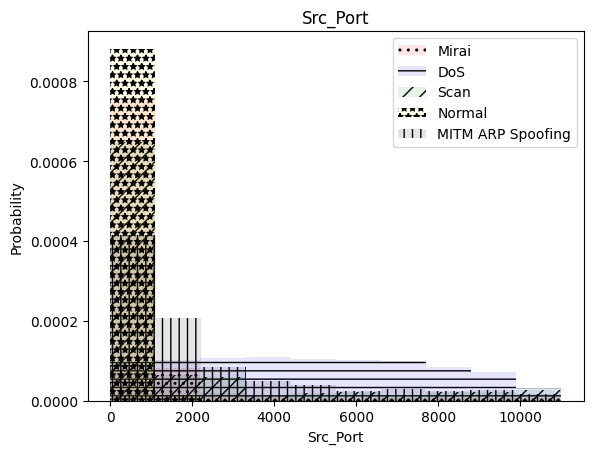

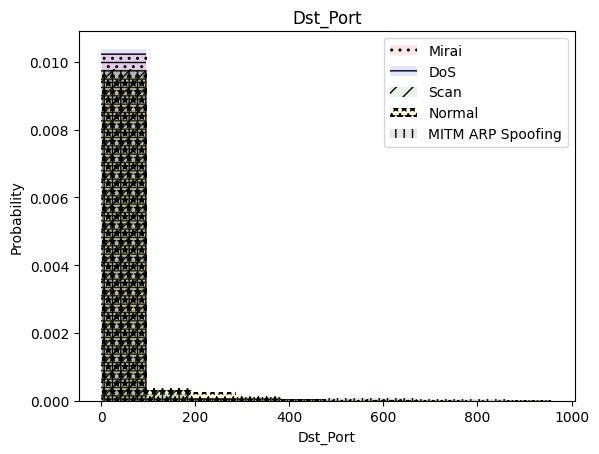

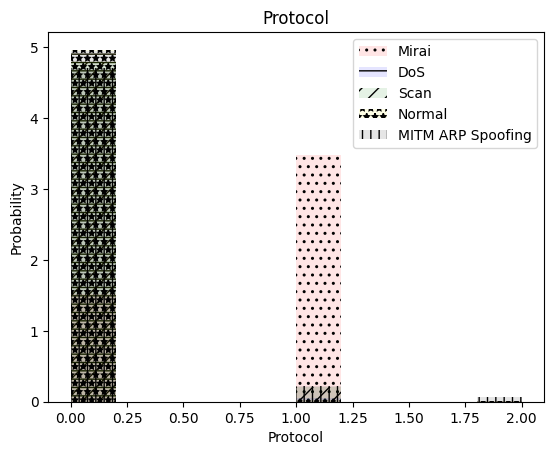

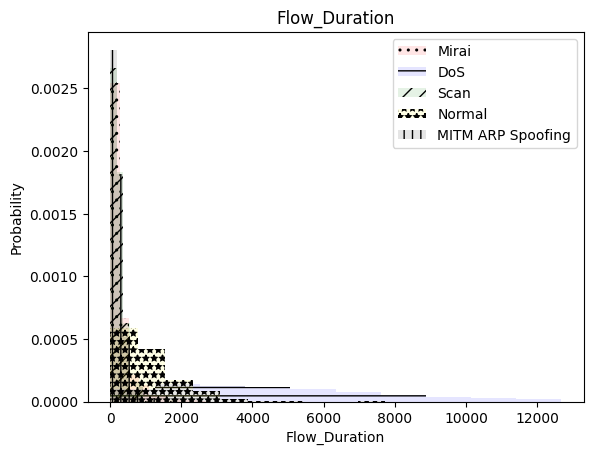

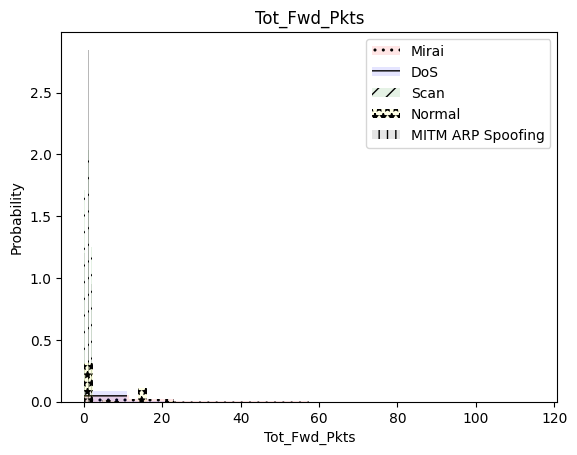

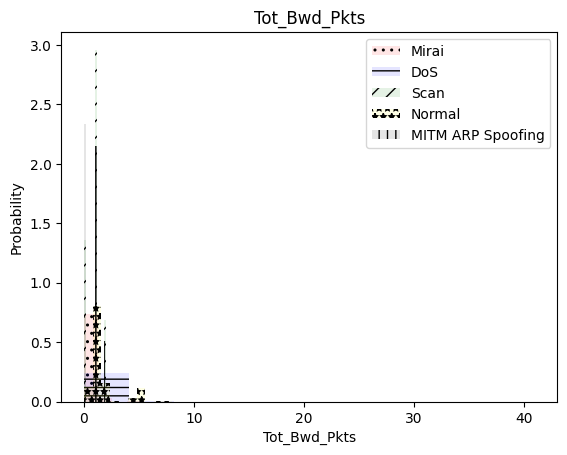

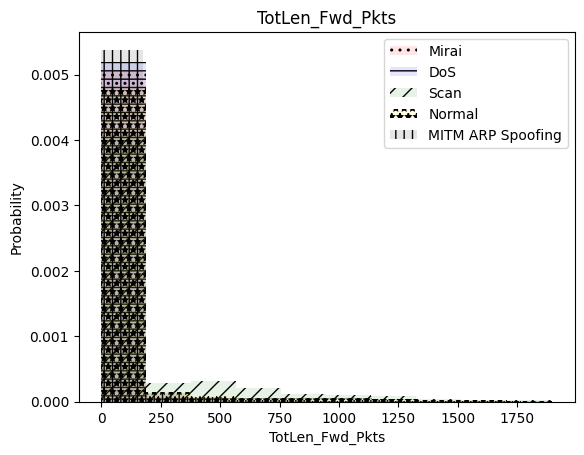

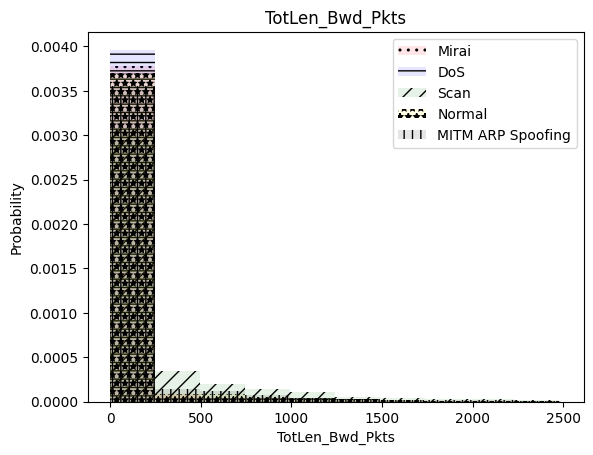

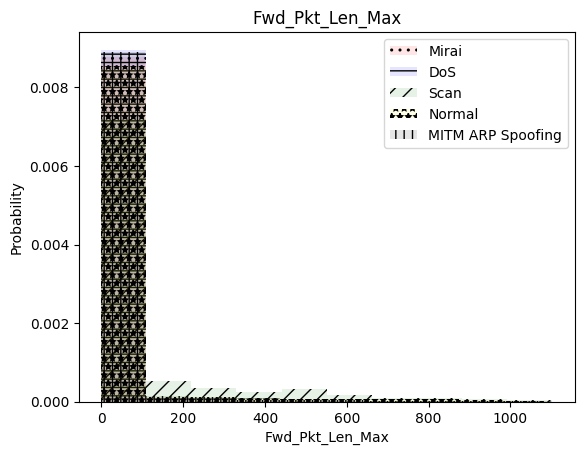

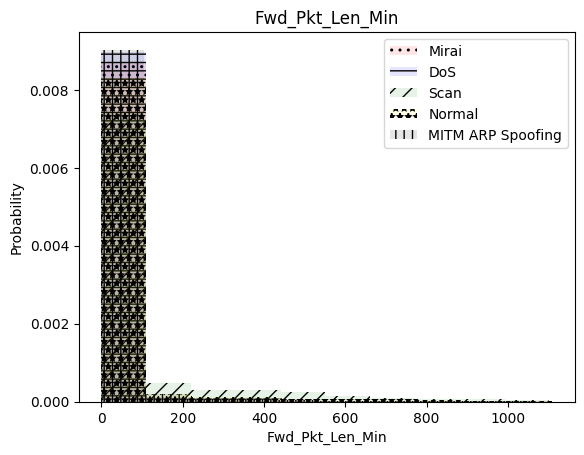

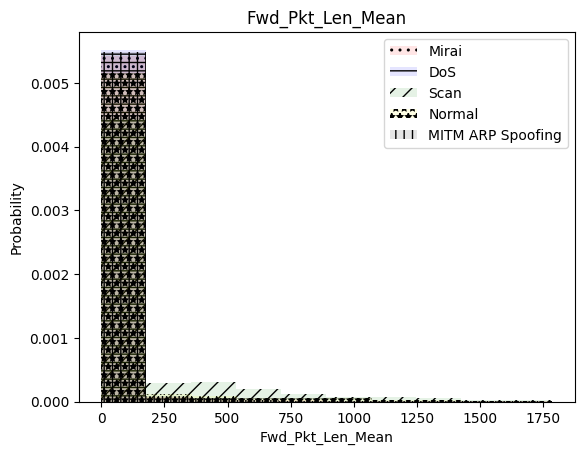

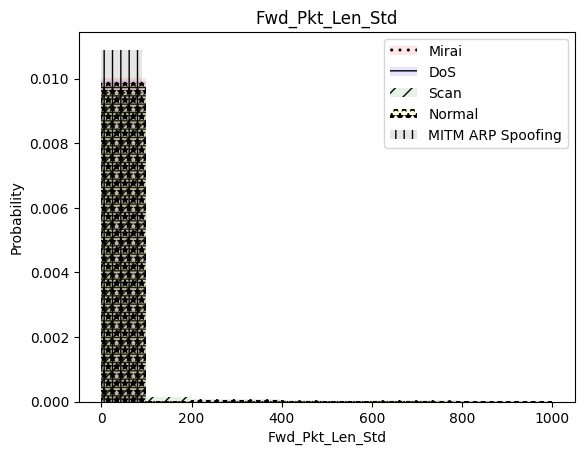

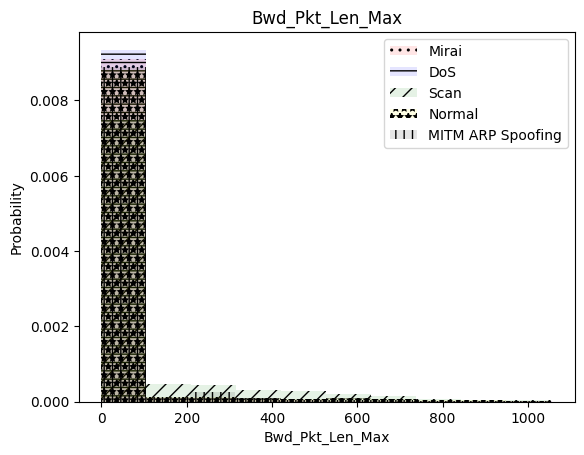

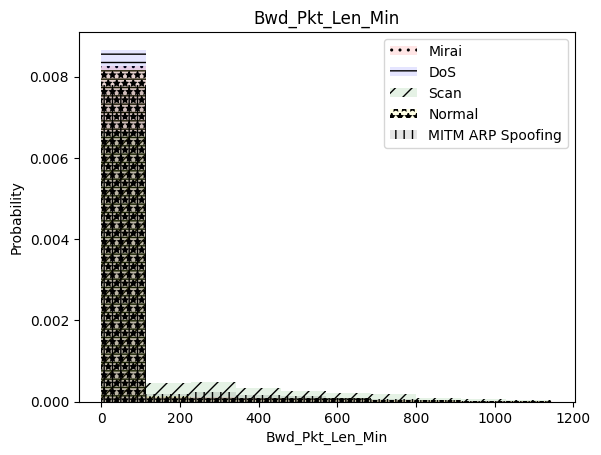

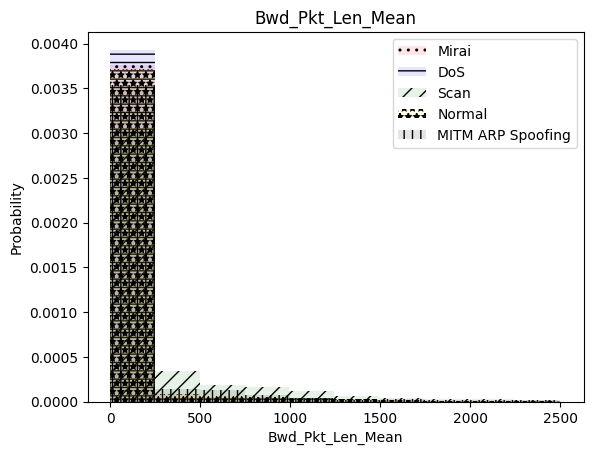

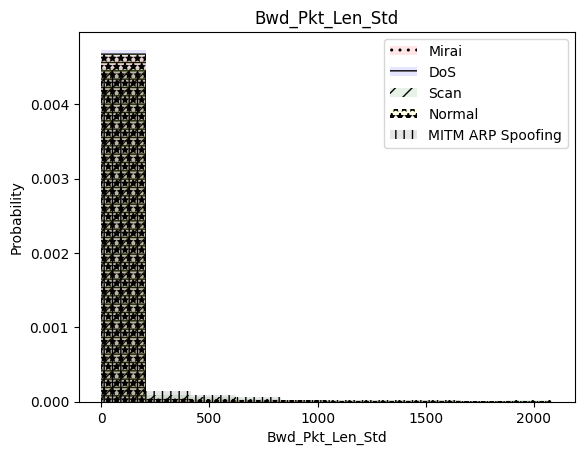

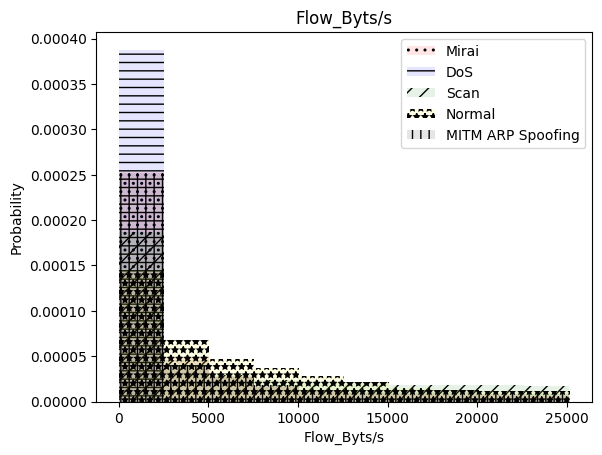

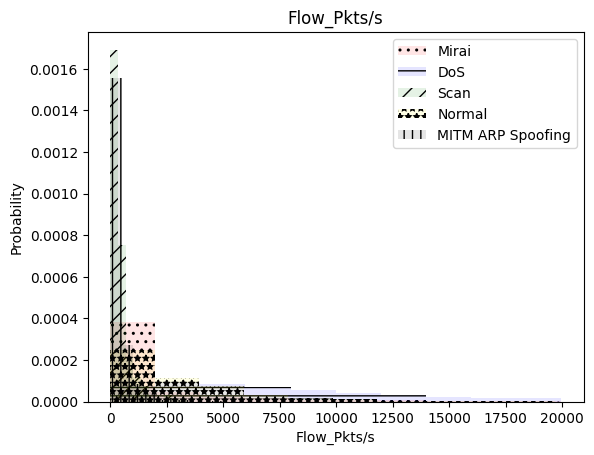

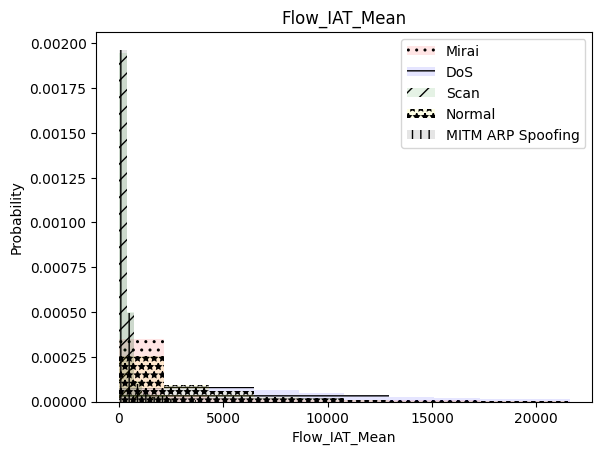

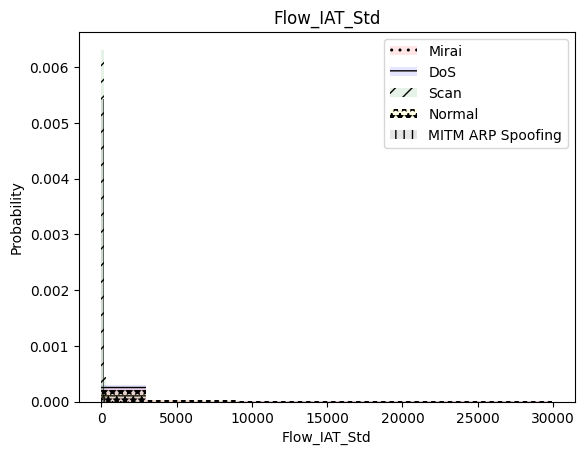

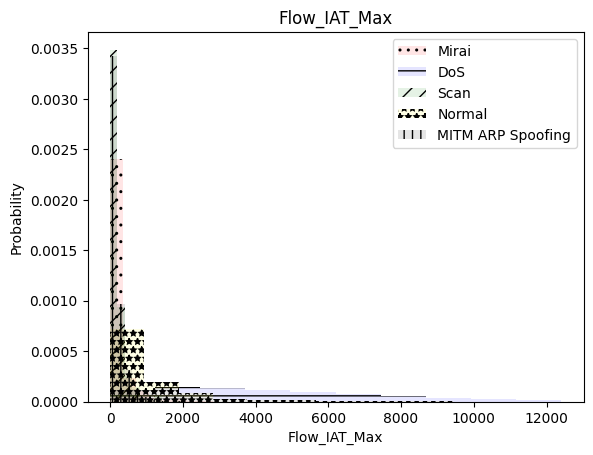

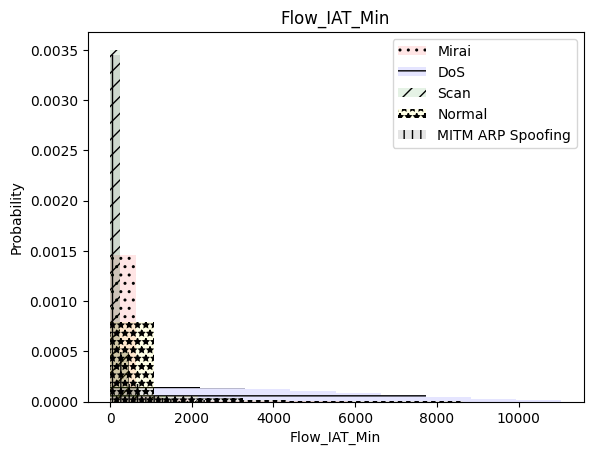

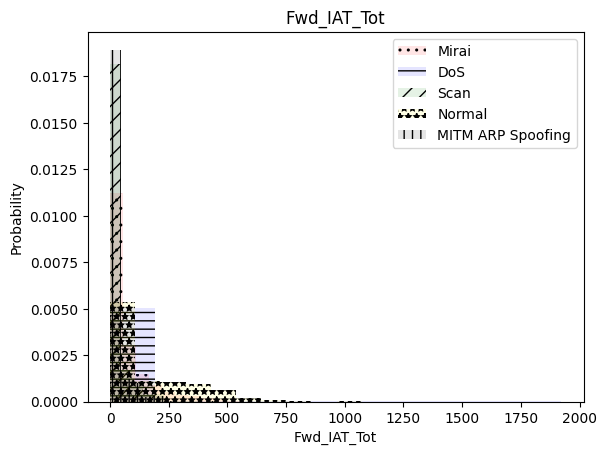

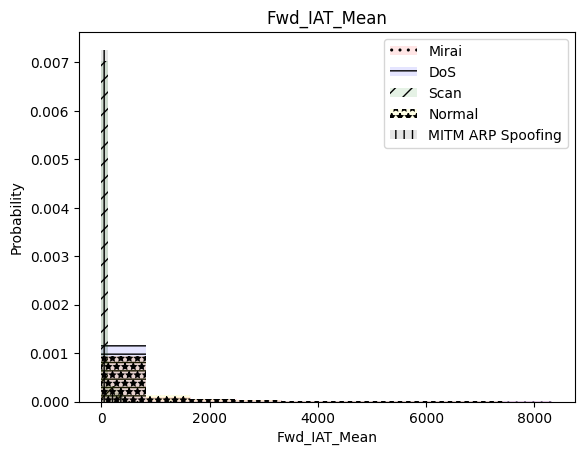

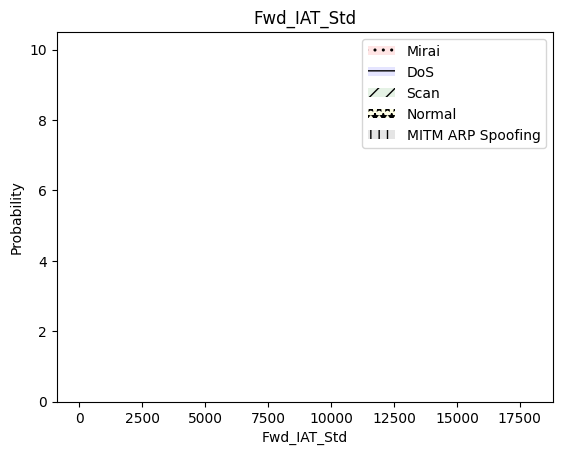

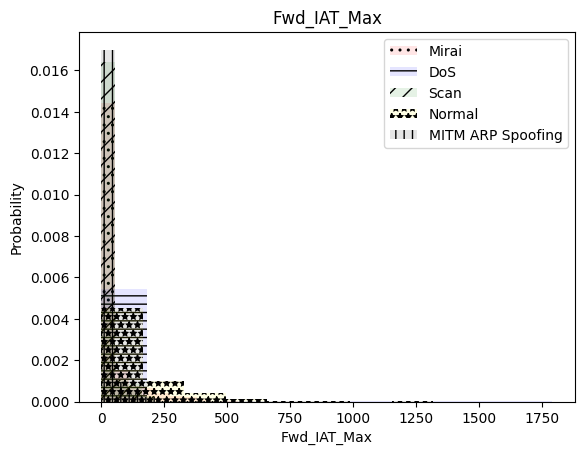

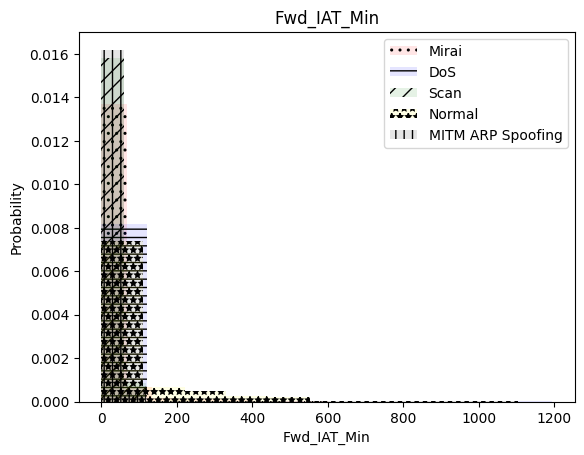

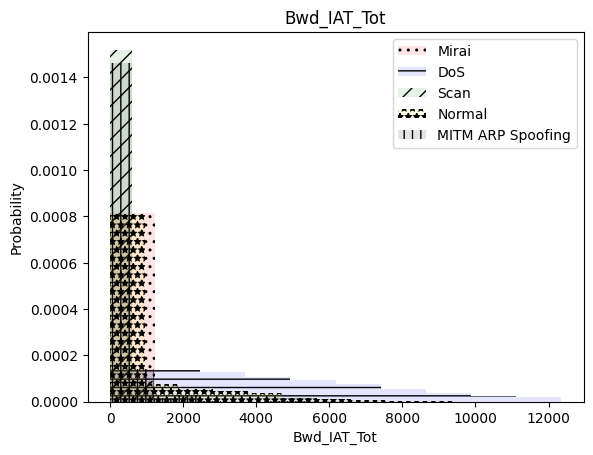

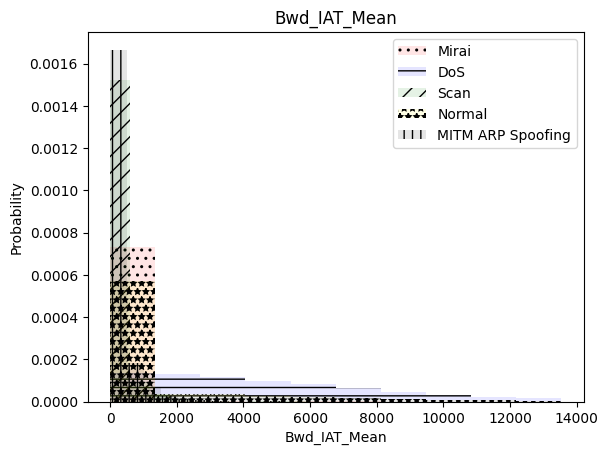

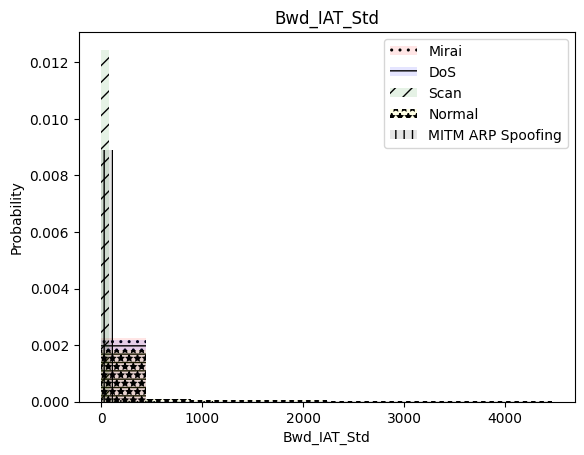

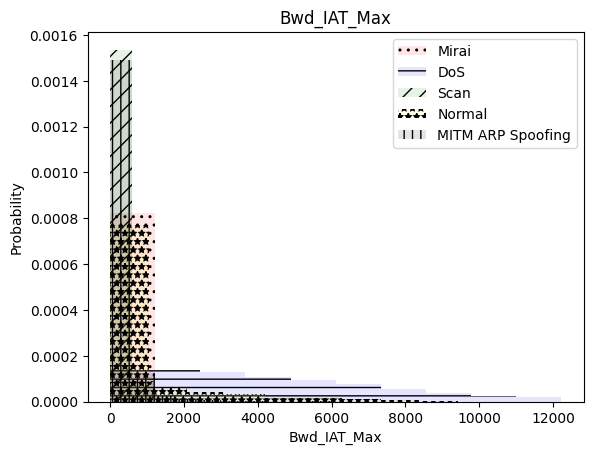

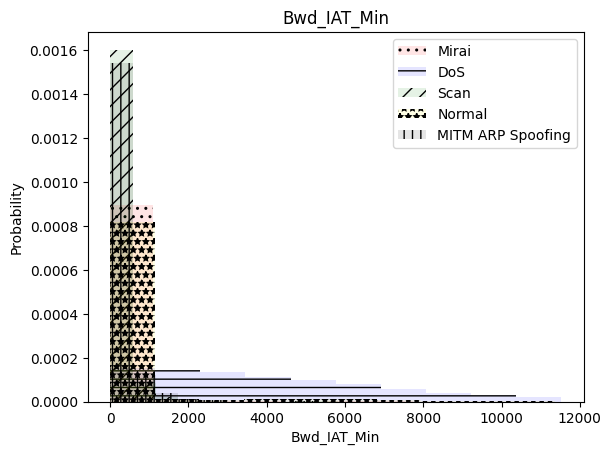

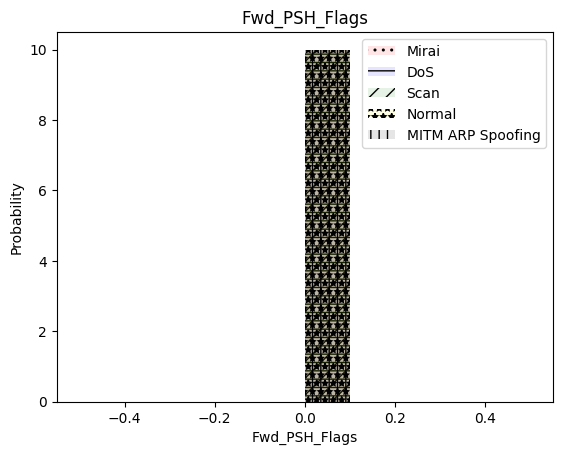

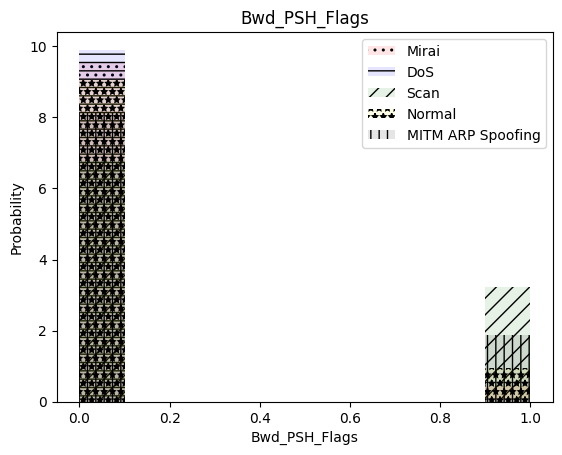

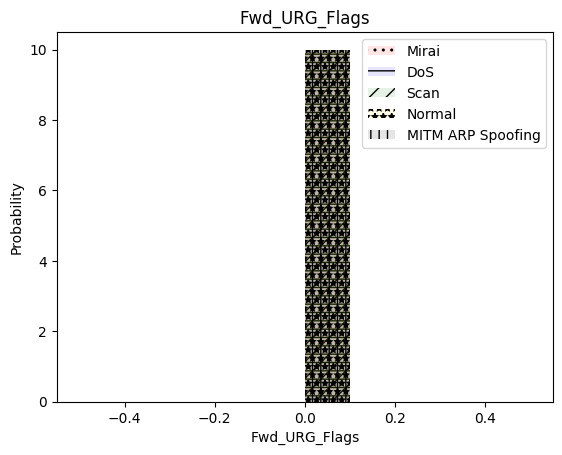

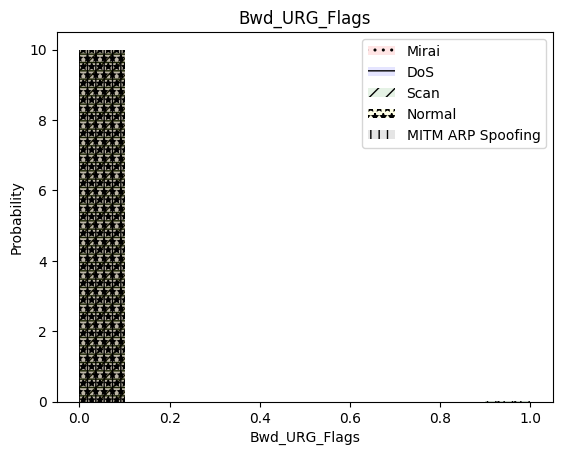

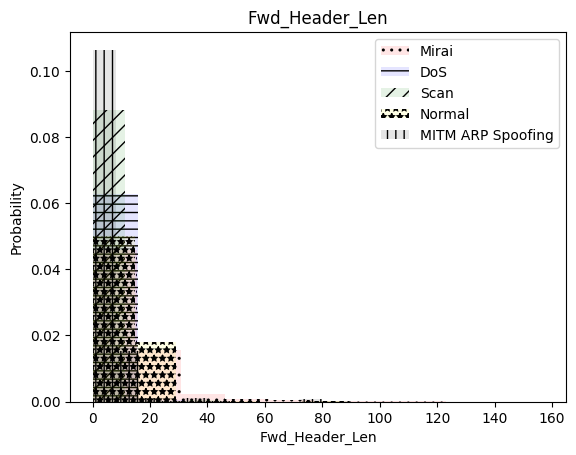

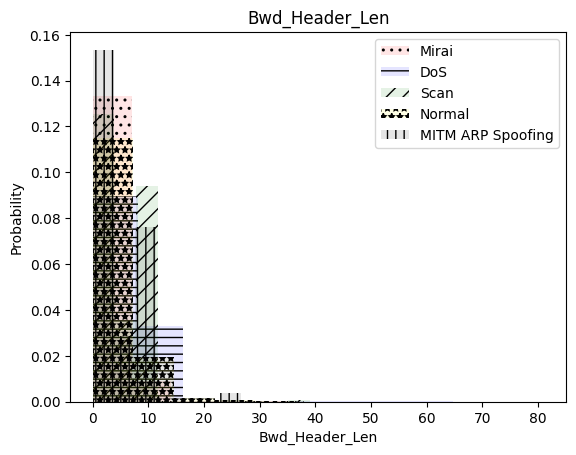

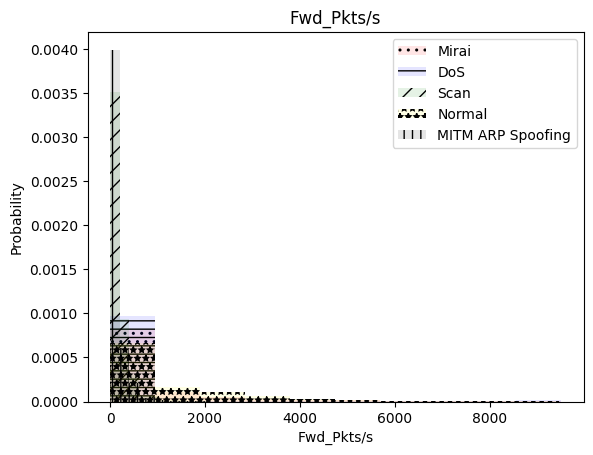

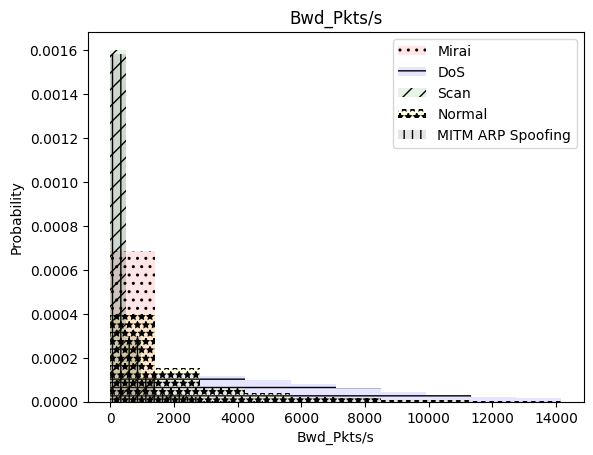

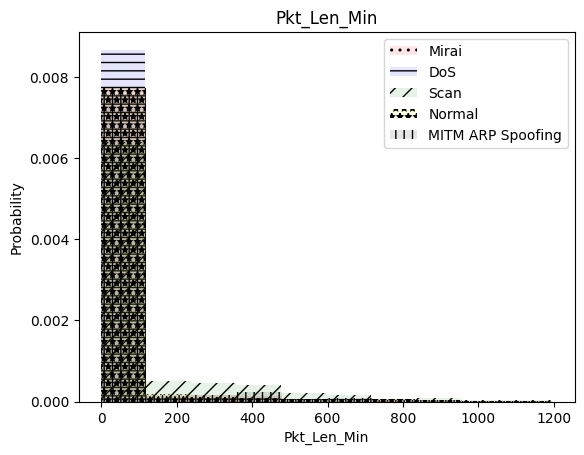

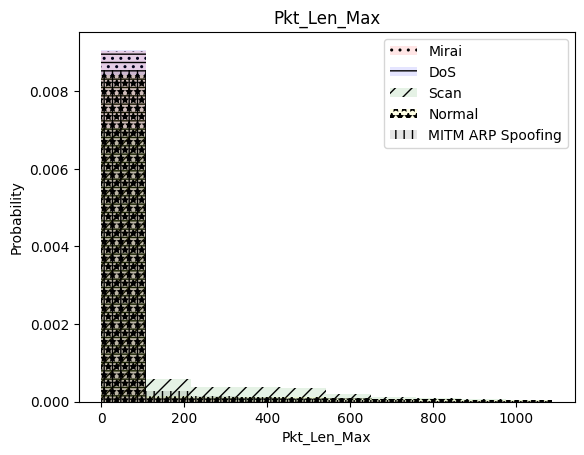

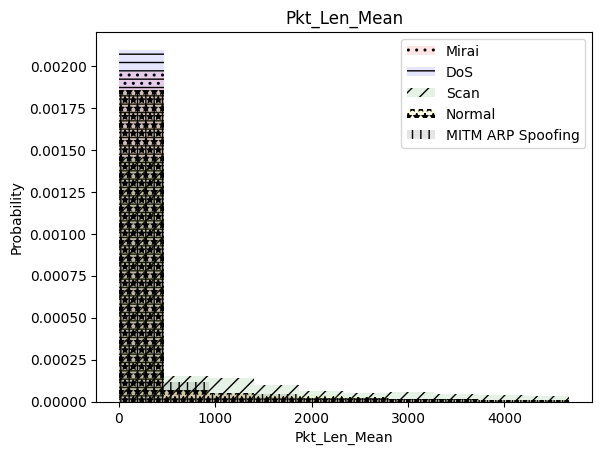

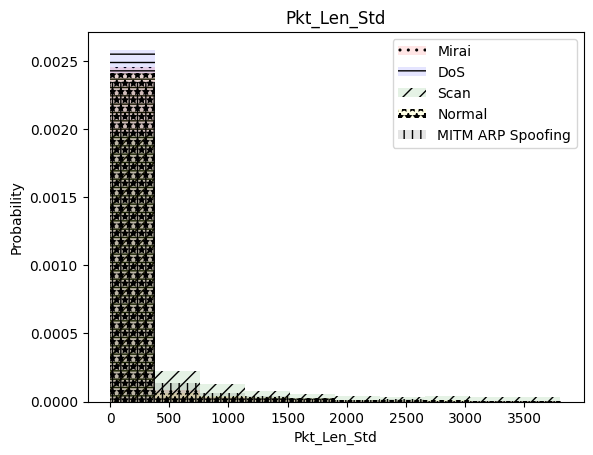

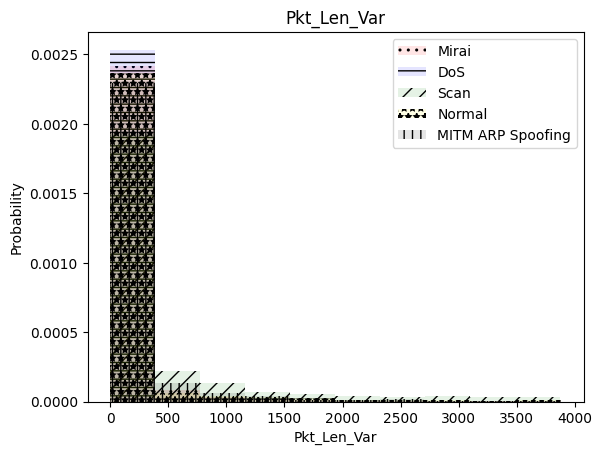

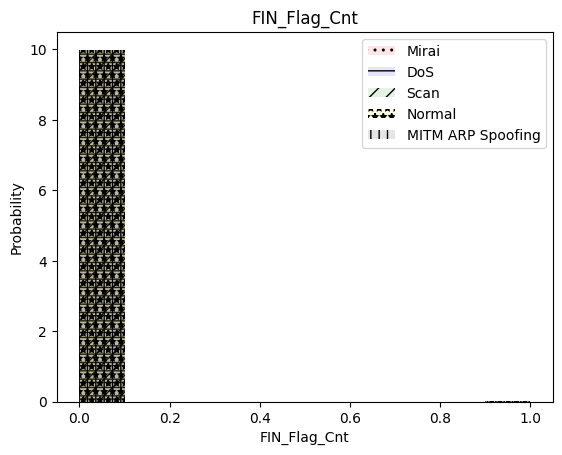

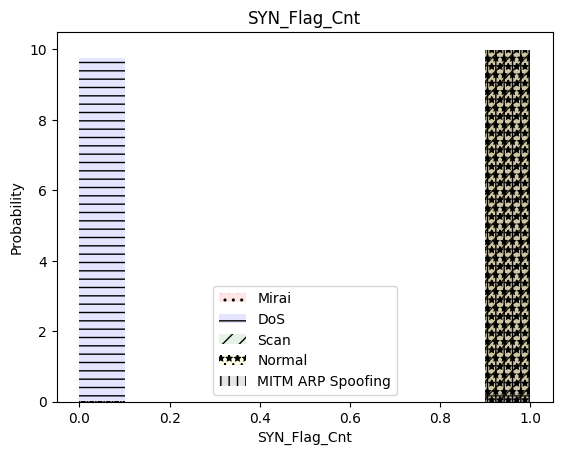

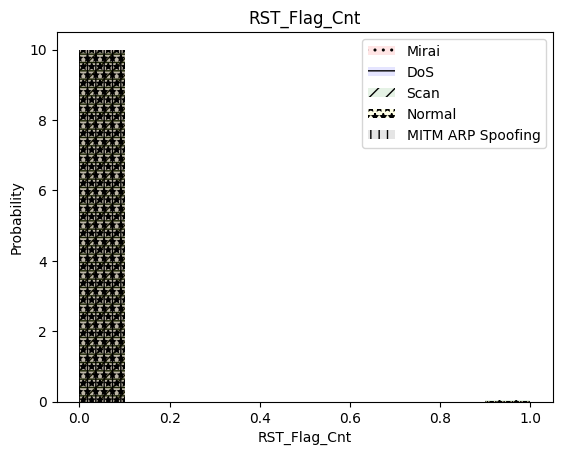

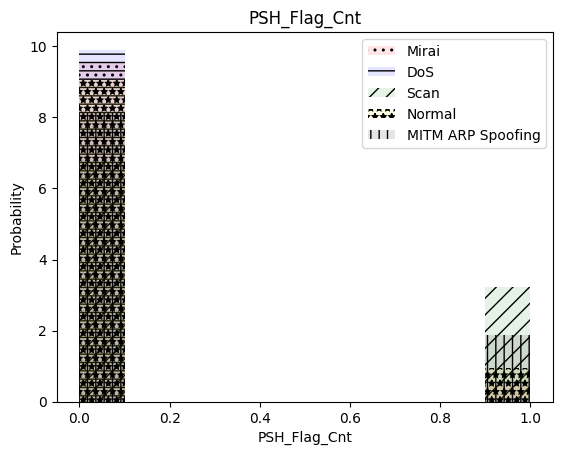

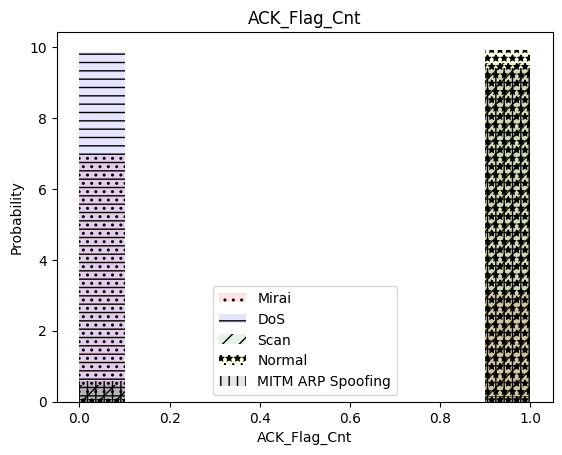

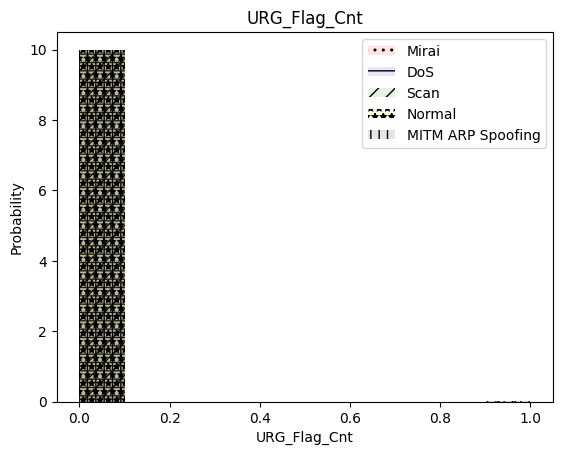

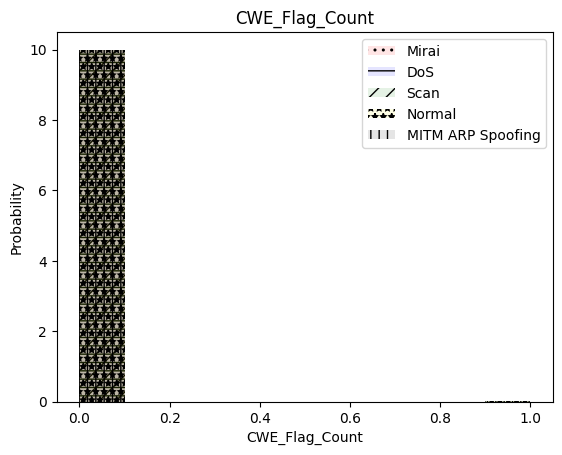

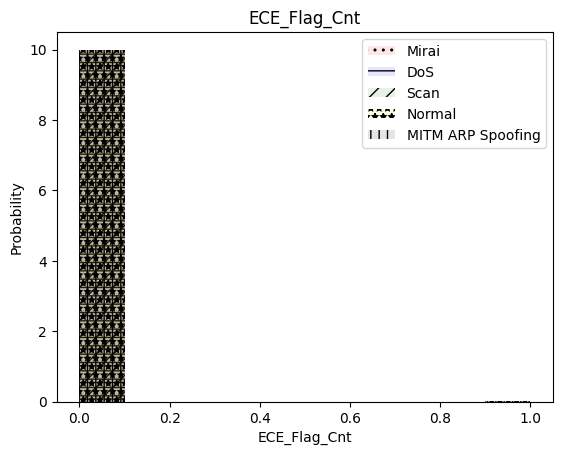

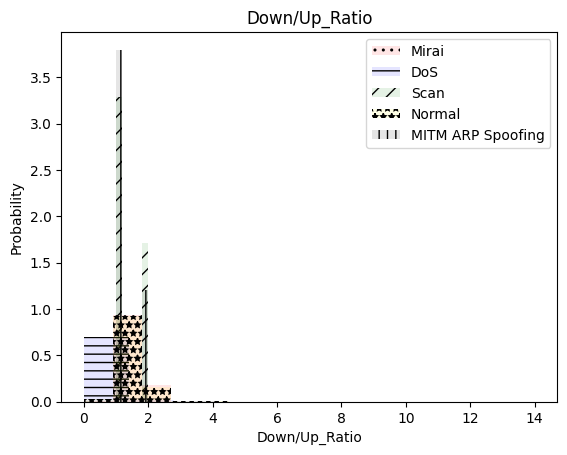

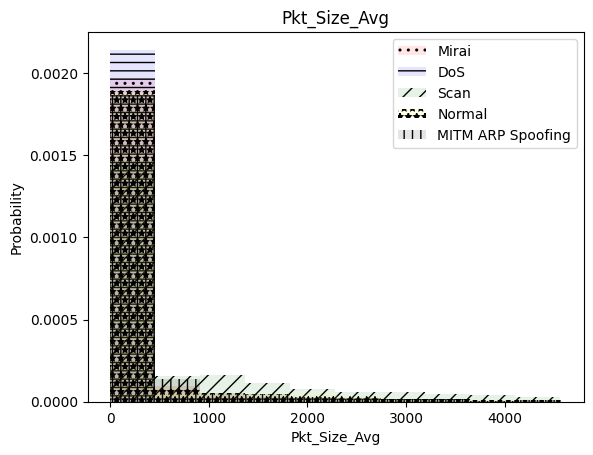

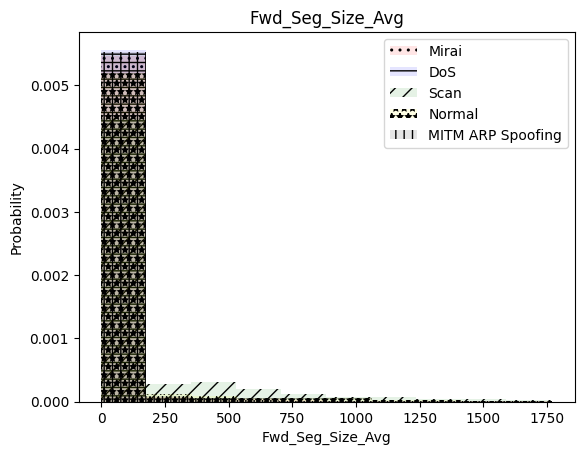

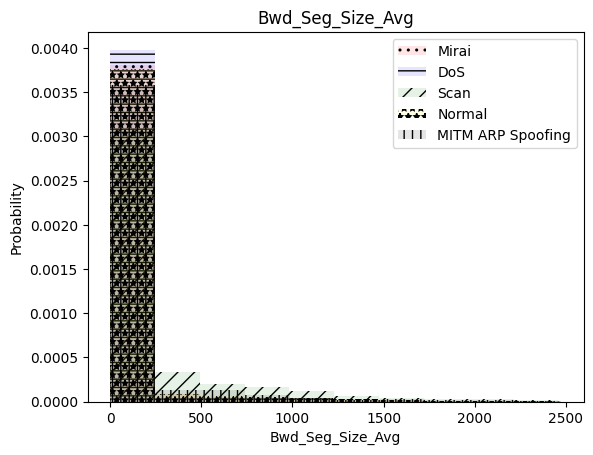

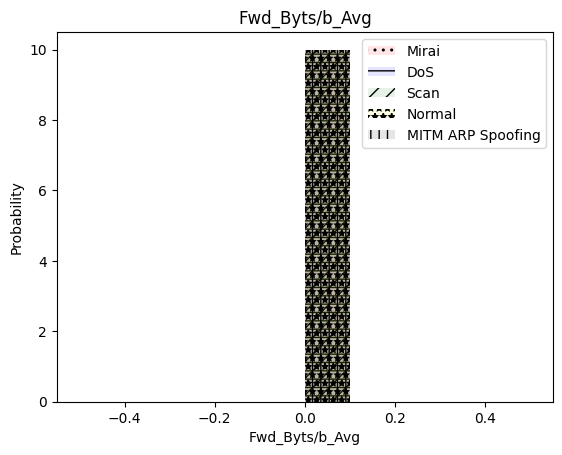

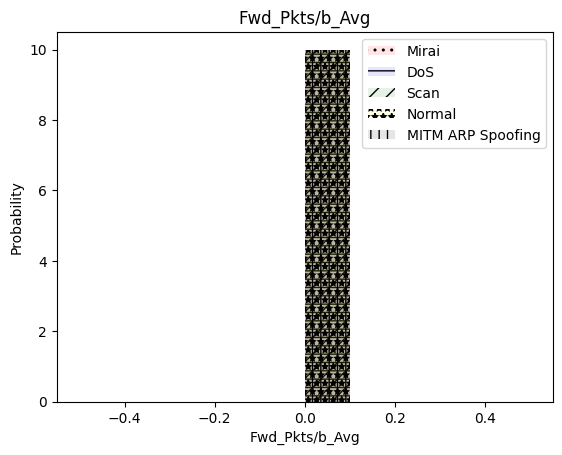

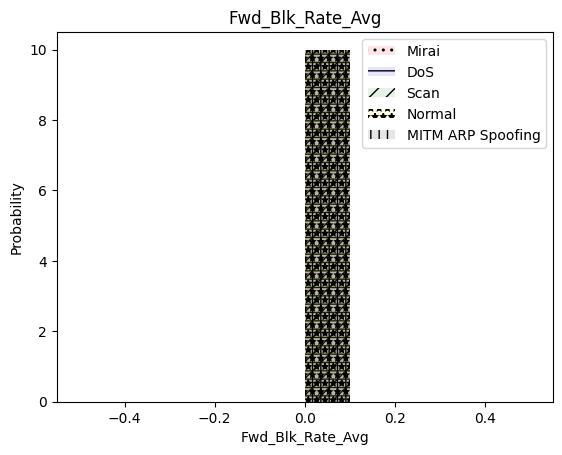

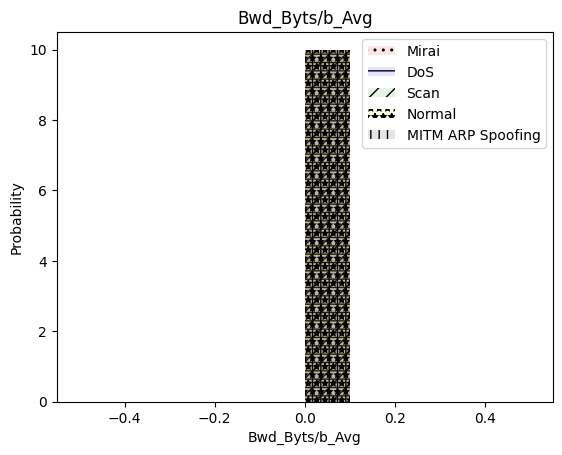

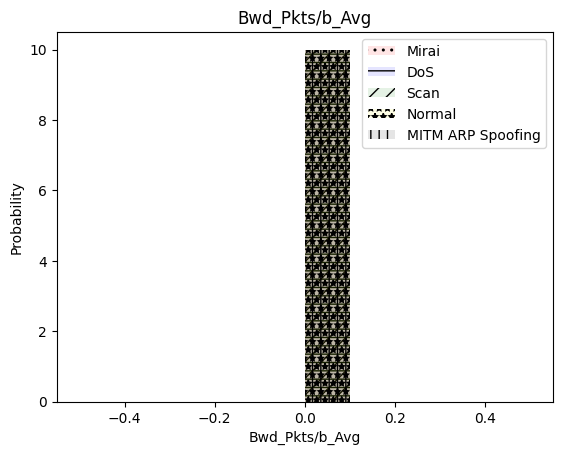

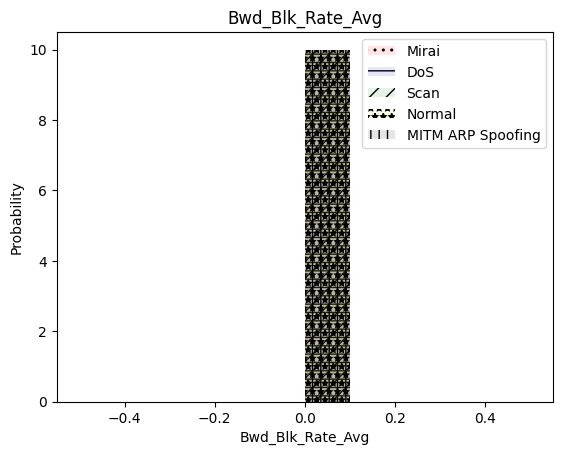

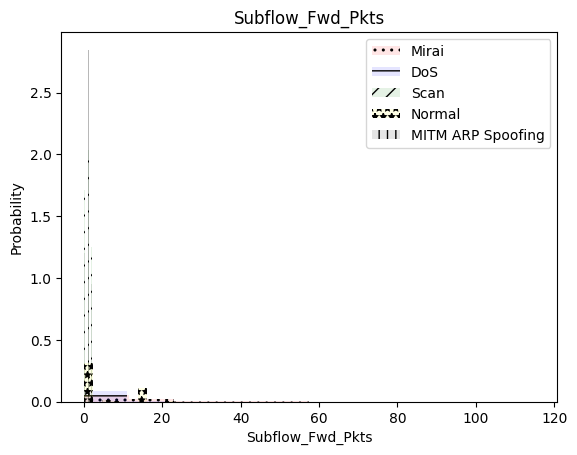

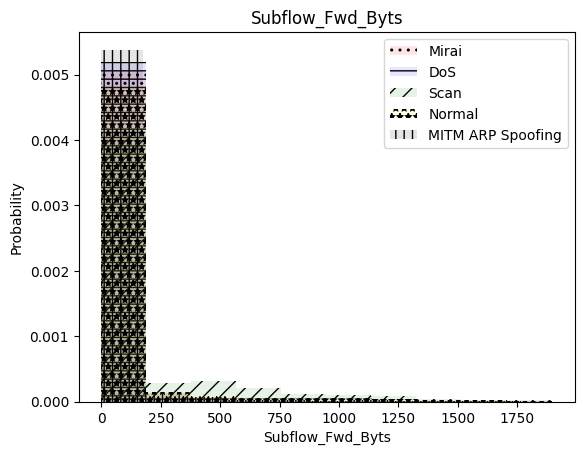

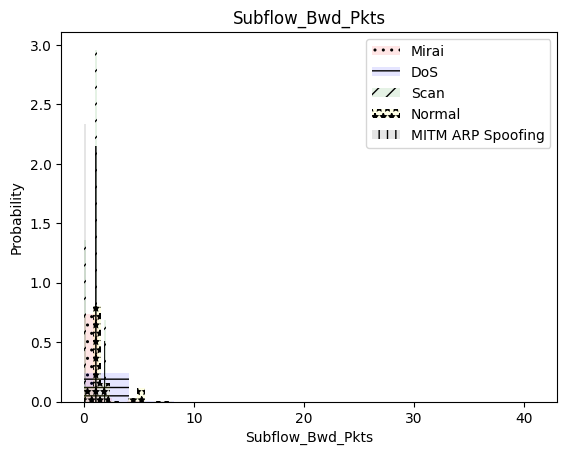

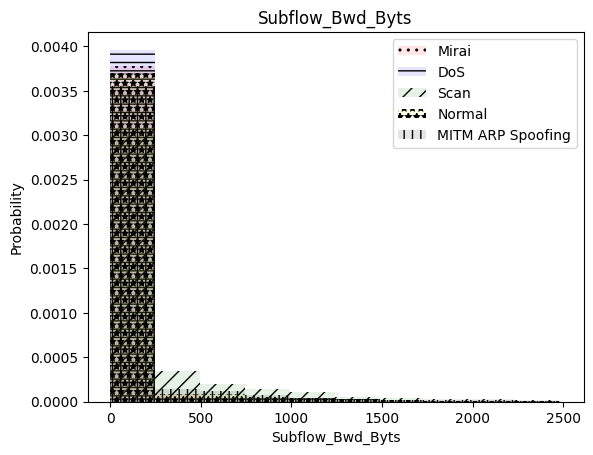

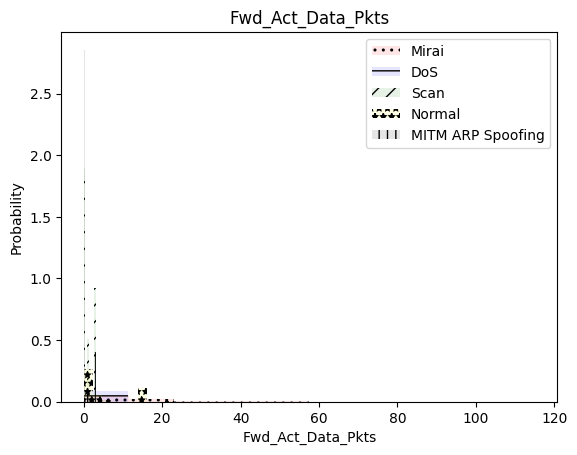

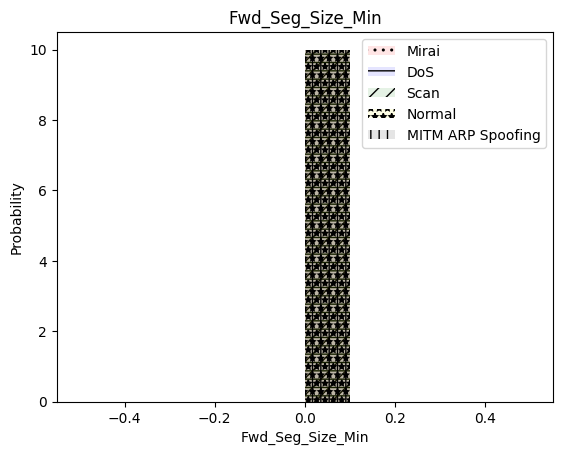

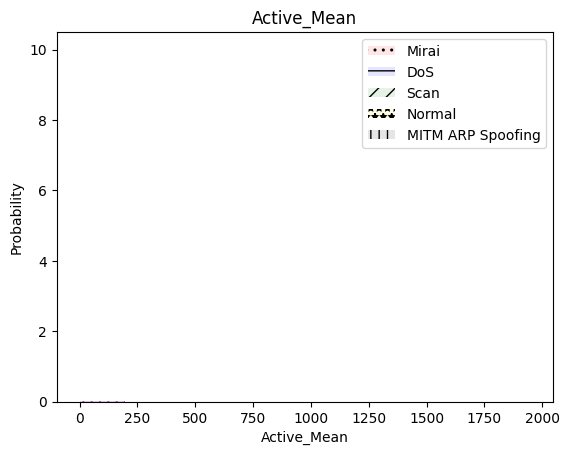

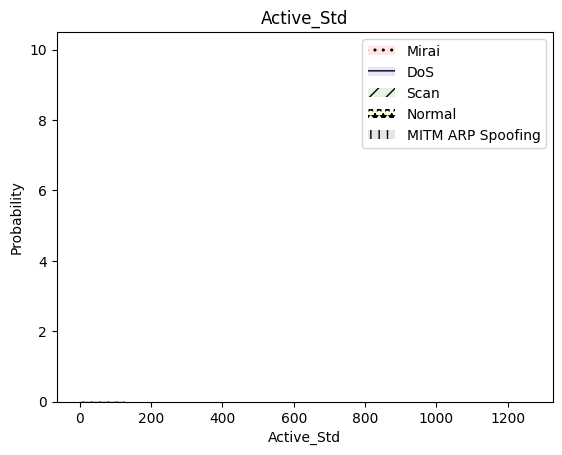

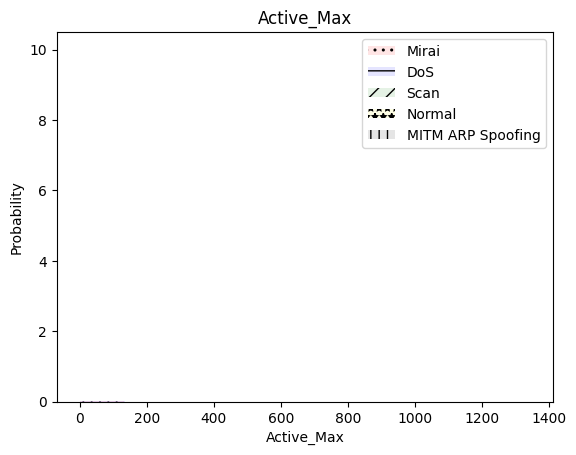

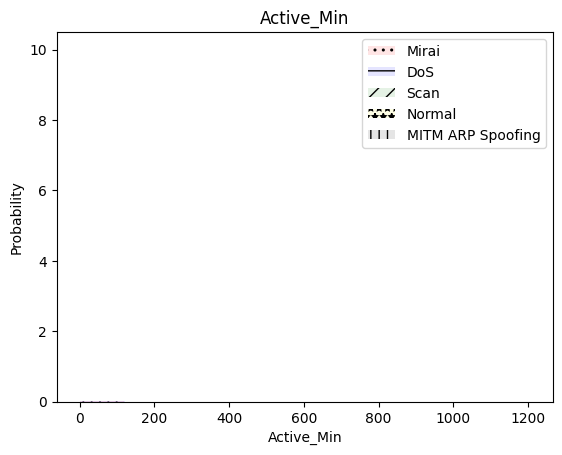

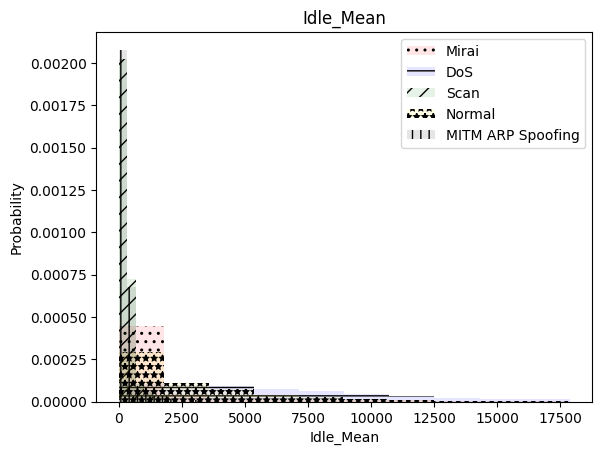

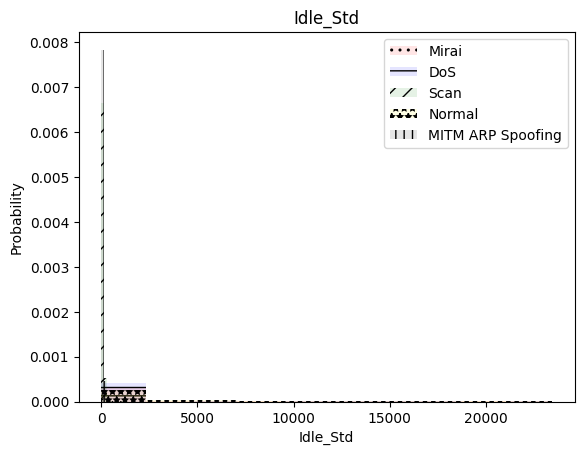

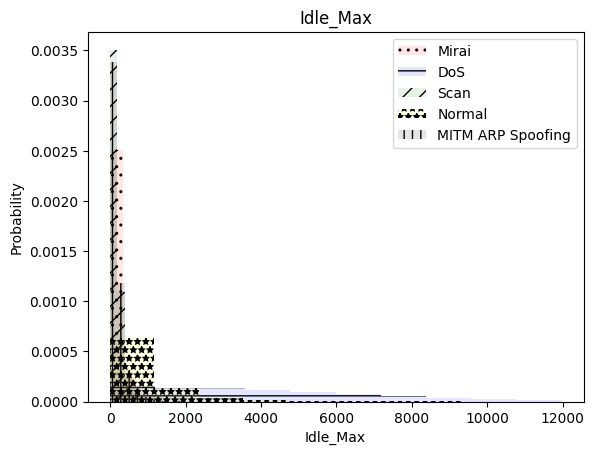

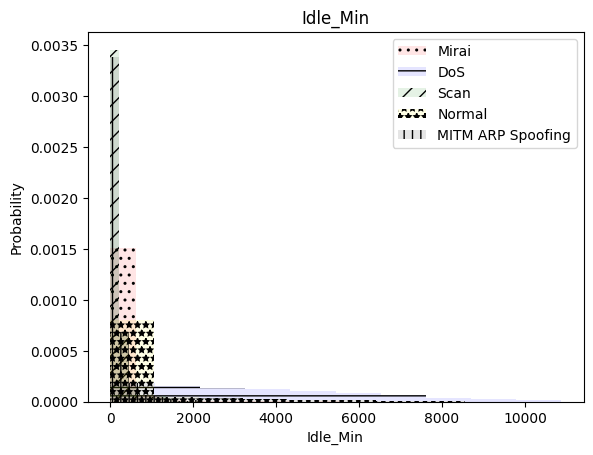

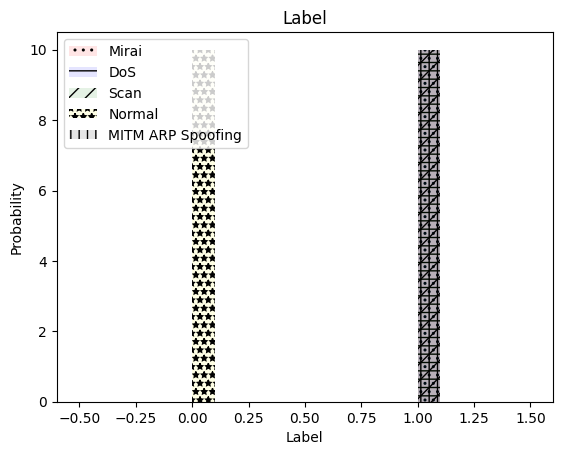

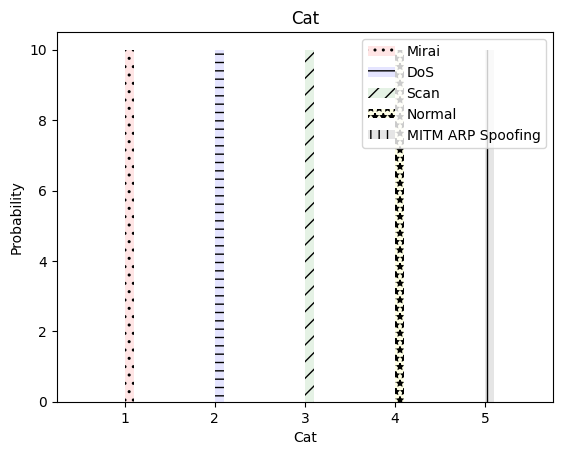

In [14]:
for label in df.columns:

  plt.hist(alt_df[alt_df['Cat'] == 1][label], color = 'Red', label = 'Mirai', alpha = 0.1, density = True, hatch='..')

  plt.hist(alt_df[alt_df['Cat'] == 2][label], color = 'Blue', label = 'DoS', alpha = 0.1, density = True, hatch='--')

  plt.hist(alt_df[alt_df['Cat'] == 3][label], color = 'Green', label = 'Scan', alpha = 0.1, density = True, hatch='//')

  plt.hist(alt_df[alt_df['Cat'] == 4][label], color = 'Yellow', label = 'Normal', alpha = 0.1, density = True, hatch='**')

  plt.hist(alt_df[alt_df['Cat'] == 5][label], color = 'Black', label = 'MITM ARP Spoofing', alpha = 0.1, density = True, hatch='||')

  plt.title(label)

  plt.ylabel("Probability")

  plt.xlabel(label)

  plt.legend()

  plt.show()

Base on the histograms above, there are many irrelevant data to the observation, including data with no values whatsoever and data with the same value for every observation. We of course do not want that, so we have to drop all of those features. However, there are many other features with little relation to the target, so I should check and verify it

*- Check for relationship points and show it.*


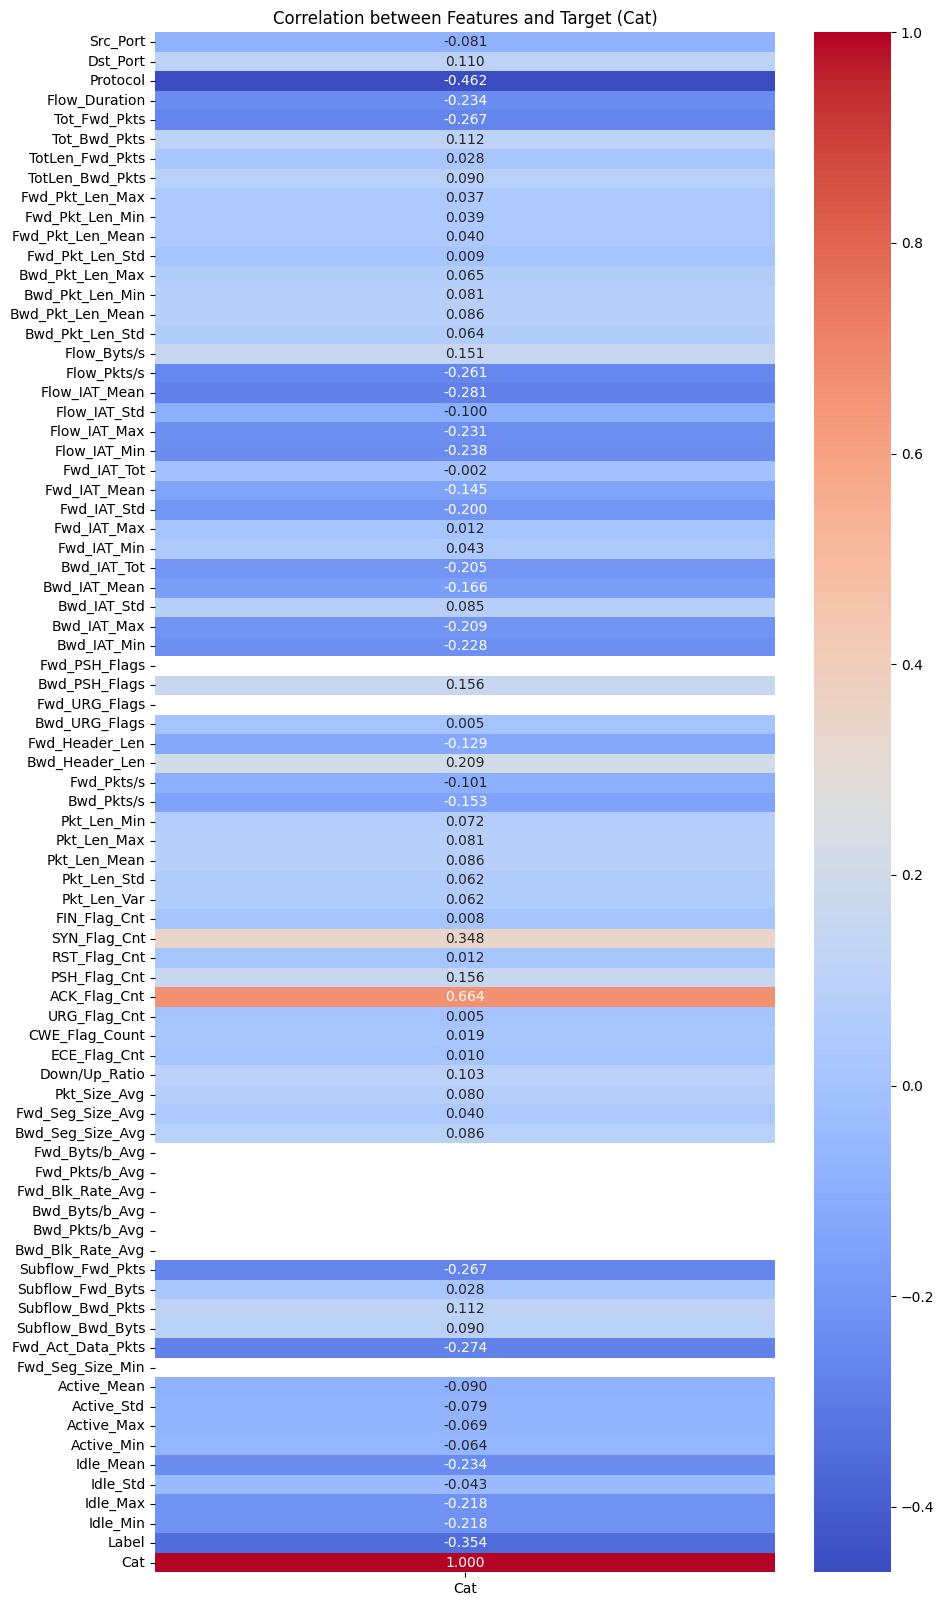

In [15]:
correlation_matrix = alt_df.corr()

target_correlation = correlation_matrix['Cat']

plt.figure(figsize=(10, 20))
sns.heatmap(target_correlation.to_frame(), annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation between Features and Target (Cat)')
plt.show()

*- Remove unnecessary data.*

Including features with less than 0.03 relationship points or have a null value




In [16]:
# Identify features with low correlation (absolute value < 0.03)
features_to_remove = target_correlation[abs(target_correlation) < 0.03].index.tolist()
features_to_remove.extend(target_correlation[target_correlation.isnull()].index.tolist())
# Remove these features from the original dataframe (df)
df = df.drop(columns=features_to_remove)

# Print the list of removed features
print("Removed Features:", features_to_remove)

Removed Features: ['TotLen_Fwd_Pkts', 'Fwd_Pkt_Len_Std', 'Fwd_IAT_Tot', 'Fwd_IAT_Max', 'Bwd_URG_Flags', 'FIN_Flag_Cnt', 'RST_Flag_Cnt', 'URG_Flag_Cnt', 'CWE_Flag_Count', 'ECE_Flag_Cnt', 'Subflow_Fwd_Byts', 'Fwd_PSH_Flags', 'Fwd_URG_Flags', 'Fwd_Byts/b_Avg', 'Fwd_Pkts/b_Avg', 'Fwd_Blk_Rate_Avg', 'Bwd_Byts/b_Avg', 'Bwd_Pkts/b_Avg', 'Bwd_Blk_Rate_Avg', 'Fwd_Seg_Size_Min']


In [17]:
df.head()

Src_Port  Dst_Port  Protocol  Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  \
1      2179       554         6           5310             1             2   
3     52964      9020         6            151             0             2   
4     36763      1900        17            153             2             1   
5     41980       443         6            157             2             1   
6     60175      8899        17            139            20             1   

   TotLen_Bwd_Pkts  Fwd_Pkt_Len_Max  Fwd_Pkt_Len_Min  Fwd_Pkt_Len_Mean  ...  \
1              0.0              0.0              0.0               0.0  ...   
3           2776.0              0.0              0.0               0.0  ...   
4            420.0            452.0            434.0             443.0  ...   
5              0.0              0.0              0.0               0.0  ...   
6             32.0             32.0             32.0              32.0  ...   

   Active_Mean  Active_Std  Active_Max  Active_Min  Idle_Mean     Idle_Std  \
1          0.0         0.0         0.0         0.0    2655.00  2261.327486   
3          0.0         0.0         0.0         0.0     151.00     0.000000   
4          0.0         0.0         0.0         0.0      76.50     0.707107   
5          0.0         0.0         0.0         0.0      78.50     6.363961   
6          0.0         0.0         0.0         0.0       6.95     1.669384   

   Idle_Max  Idle_Min  Label  Cat  
1    4254.0    1056.0      1    2  
3     151.0     151.0      1    1  
4      77.0      76.0      1    1  
5      83.0      74.0      1    1  
6      10.0       4.0      1    1  

[5 rows x 59 columns]

*- Encode categorical data by various methods.*



**For Src_Port, and Dst_Port**, judging by the histogram, the number of unique values is too large to use one-hot encoding. Instead, for each feature, I split it into 5 columns corresponding to the percentage of that values results in each types of Cat. I call it percentage-based encoding. I also standardize it in advance since the value of these new columns are related to each other



**For Protocol**, its number of unique values is small enough to use one-hot encoding.

In [18]:
#Percentage-based Encoding

def encode_and_scale(df, column_to_encode):

    # Step 1: Calculate the percentage for each target value per unique value in column_to_encode

    df_counts = df.groupby([column_to_encode, 'Cat']).size().unstack(fill_value=0)

    df_percentage = df_counts.div(df_counts.sum(axis=1), axis=0)



    # Step 2: Rename columns to reflect the target values as percentages

    df_percentage.columns = [f'{column_to_encode}_{int(col)}_perc' for col in df_percentage.columns]



    # Step 3: Merge the new columns with the original dataframe

    df = df.merge(df_percentage, on=column_to_encode, how='left').drop(columns=column_to_encode)



    # Step 4: Identify new columns and reorder to place them in the original column's position

    new_cols = list(df_percentage.columns)



    # Safely reordering columns in case any new columns are missing

    all_cols = new_cols + [col for col in df.columns if col not in new_cols]

    df = df.reindex(columns=all_cols)



    # Step 5: Standard scale the new percentage columns as a single group

    scaler = StandardScaler()

    df[new_cols] = scaler.fit_transform(df[new_cols].values.reshape(-1, 1)).reshape(df[new_cols].shape)



    return df

for column in ['Src_Port', 'Dst_Port']:

  df = encode_and_scale(df, column)

df.head()

Dst_Port_1_perc  Dst_Port_2_perc  Dst_Port_3_perc  Dst_Port_4_perc  \
0        -0.545709         2.178688        -0.541559        -0.545709   
1         0.877079        -0.545495        -0.162041         0.106098   
2         0.722242        -0.503678        -0.076357        -0.335552   
3         0.895437        -0.521816        -0.274725        -0.284668   
4         2.182837        -0.545709        -0.545709        -0.545709   

   Dst_Port_5_perc  Src_Port_1_perc  Src_Port_2_perc  Src_Port_3_perc  \
0        -0.545709        -0.514293         2.057171        -0.514293   
1        -0.275641         2.057171        -0.514293        -0.514293   
2         0.193345         2.057171        -0.514293        -0.514293   
3         0.185772         2.057171        -0.514293        -0.514293   
4        -0.545709         2.057171        -0.514293        -0.514293   

   Src_Port_4_perc  Src_Port_5_perc  ...  Active_Mean  Active_Std  Active_Max  \
0        -0.514293        -0.514293  ...          0.0         0.0         0.0   
1        -0.514293        -0.514293  ...          0.0         0.0         0.0   
2        -0.514293        -0.514293  ...          0.0         0.0         0.0   
3        -0.514293        -0.514293  ...          0.0         0.0         0.0   
4        -0.514293        -0.514293  ...          0.0         0.0         0.0   

   Active_Min  Idle_Mean     Idle_Std  Idle_Max  Idle_Min  Label  Cat  
0         0.0    2655.00  2261.327486    4254.0    1056.0      1    2  
1         0.0     151.00     0.000000     151.0     151.0      1    1  
2         0.0      76.50     0.707107      77.0      76.0      1    1  
3         0.0      78.50     6.363961      83.0      74.0      1    1  
4         0.0       6.95     1.669384      10.0       4.0      1    1  

[5 rows x 67 columns]

In [19]:
#One-hot Encoding

one_hot = pd.get_dummies(df['Protocol'], prefix='Protocol')

df.drop(columns=['Protocol'], inplace=True)

for column in one_hot.columns:

    df.insert(0, column, one_hot[column])


In [20]:
df.head()

Protocol_17  Protocol_6  Protocol_0  Dst_Port_1_perc  Dst_Port_2_perc  \
0        False        True       False        -0.545709         2.178688   
1        False        True       False         0.877079        -0.545495   
2         True       False       False         0.722242        -0.503678   
3        False        True       False         0.895437        -0.521816   
4         True       False       False         2.182837        -0.545709   

   Dst_Port_3_perc  Dst_Port_4_perc  Dst_Port_5_perc  Src_Port_1_perc  \
0        -0.541559        -0.545709        -0.545709        -0.514293   
1        -0.162041         0.106098        -0.275641         2.057171   
2        -0.076357        -0.335552         0.193345         2.057171   
3        -0.274725        -0.284668         0.185772         2.057171   
4        -0.545709        -0.545709        -0.545709         2.057171   

   Src_Port_2_perc  ...  Active_Mean  Active_Std  Active_Max  Active_Min  \
0         2.057171  ...          0.0         0.0         0.0         0.0   
1        -0.514293  ...          0.0         0.0         0.0         0.0   
2        -0.514293  ...          0.0         0.0         0.0         0.0   
3        -0.514293  ...          0.0         0.0         0.0         0.0   
4        -0.514293  ...          0.0         0.0         0.0         0.0   

   Idle_Mean     Idle_Std  Idle_Max  Idle_Min  Label  Cat  
0    2655.00  2261.327486    4254.0    1056.0      1    2  
1     151.00     0.000000     151.0     151.0      1    1  
2      76.50     0.707107      77.0      76.0      1    1  
3      78.50     6.363961      83.0      74.0      1    1  
4       6.95     1.669384      10.0       4.0      1    1  

[5 rows x 69 columns]

**- Split datas for training and testing**




*- Scale data (skip scaled data) and Oversample for underwhelming predictions*

In [21]:
def scale_dataset(dataframe, oversample=False):

  X = dataframe[dataframe.columns[:-1]].values

  y = dataframe[dataframe.columns[-1]].values



  # Get columns that haven't been standardized in advance

  cols_to_standardize = [col for col in dataframe.columns[:-1] if not col.endswith('perc')]

  X_to_standardize = dataframe[cols_to_standardize].values



  scaler = StandardScaler()

  X_standardized = scaler.fit_transform(X_to_standardize)



  # Replace the original columns with the standardized ones

  X_df = pd.DataFrame(X)

  for i, col in enumerate(cols_to_standardize):

      X_df[col] = X_standardized[:, i]

  X = X_df.values



  if oversample:

    ros = RandomOverSampler()

    X, y = ros.fit_resample(X, y)



  data = np.hstack((X, np.reshape(y, (-1, 1))))

  # print(X.shape, y.shape)

  return data, X, y

*- Split train and test data*

In [22]:
train, test = train_test_split(df, test_size = 0.2)



train, X_train, y_train = scale_dataset(train, oversample = True)

test, X_test, y_test = scale_dataset(test, oversample = False)

In [23]:
print(len(y_train))

print(sum(y_train == 1))

print(sum(y_train == 2))

print(sum(y_train == 3))

print(sum(y_train == 4))

print(sum(y_train == 5))

358465
71693
71693
71693
71693
71693


## Use different models to analyze and make predictions

 **- K-nearest Neighbors**

In [24]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import precision_score, make_scorer, f1_score





k_range = list(range(1, 10, 2))

weight_options = ['uniform', 'distance']

param_grid = dict(n_neighbors=k_range, weights=weight_options)

print(param_grid)



scorer = make_scorer(f1_score, average='weighted')



knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv = 3, scoring=scorer)

grid.fit(X_train, y_train)

print(grid.best_score_)

print(grid.best_params_)








{'n_neighbors': [1, 3, 5, 7, 9], 'weights': ['uniform', 'distance']}


0.9860198110235419
{'n_neighbors': 1, 'weights': 'uniform'}


In [25]:
y_pred = grid.predict(X_test)



# Generate the classification report

report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           1       0.95      0.96      0.95     17905
           2       1.00      1.00      1.00     11902
           3       0.66      0.63      0.65      1506
           4       0.91      0.91      0.91      4048
           5       0.74      0.71      0.72      1657

    accuracy                           0.94     37018
   macro avg       0.85      0.84      0.85     37018
weighted avg       0.94      0.94      0.94     37018



**- Decision Tree**

In [26]:
from sklearn.tree import DecisionTreeClassifier



param_grid_dt = {

    'criterion': ['gini', 'entropy'],

    'max_depth': [None, 5],

    'min_samples_split': [2, 5],

    'min_samples_leaf': [1, 2]

}

print(param_grid_dt)

dt = DecisionTreeClassifier()



grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=3, scoring=scorer)



grid_dt.fit(X_train, y_train)



print(grid_dt.best_score_)

print(grid_dt.best_params_)

{'criterion': ['gini', 'entropy'], 'max_depth': [None, 5], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


0.9993584642770283
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [27]:
y_pred = grid_dt.predict(X_test)



# Generate the classification report

report_dt = classification_report(y_test, y_pred)

print(report_dt)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     17905
           2       1.00      1.00      1.00     11902
           3       0.97      0.98      0.98      1506
           4       1.00      1.00      1.00      4048
           5       0.98      0.96      0.97      1657

    accuracy                           1.00     37018
   macro avg       0.99      0.99      0.99     37018
weighted avg       1.00      1.00      1.00     37018



**- Random Forest**

In [28]:
from sklearn.ensemble import RandomForestClassifier



param_grid_rf = {

    'n_estimators': [5, 9],

    'max_depth': [None],

    'min_samples_split': [2, 5],

    'min_samples_leaf': [1, 2],

    'bootstrap': [True, False]

}

print(param_grid_rf)


rf = RandomForestClassifier()



grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, scoring=scorer)



grid_rf.fit(X_train, y_train)



print(grid_rf.best_score_)

print(grid_rf.best_params_)

{'n_estimators': [5, 9], 'max_depth': [None], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


0.9992943230735948
{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 9}


In [29]:
y_pred = grid_rf.predict(X_test)



# Generate the classification report

report_rf = classification_report(y_test, y_pred)

print(report_rf)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     17905
           2       1.00      1.00      1.00     11902
           3       0.98      0.98      0.98      1506
           4       1.00      1.00      1.00      4048
           5       0.98      0.98      0.98      1657

    accuracy                           1.00     37018
   macro avg       0.99      0.99      0.99     37018
weighted avg       1.00      1.00      1.00     37018



**- Logistic Regression (scrapped)**

In [30]:
'''from sklearn.linear_model import LogisticRegression



param_grid_lr = {

    'penalty': ['l1', 'l2'],

    'C': [0.01, 1, 10],

    'solver': ['liblinear'],  # 'liblinear' handles L1 penalty well

    'max_iter': [15, 25, 50]

}



lr = LogisticRegression()



grid_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=3, scoring=scorer)



grid_lr.fit(X_train, y_train)



print(grid_lr.best_score_)

grid_lr.best_params_'''

"from sklearn.linear_model import LogisticRegression\n\n\n\nparam_grid_lr = {\n\n    'penalty': ['l1', 'l2'],\n\n    'C': [0.01, 1, 10],\n\n    'solver': ['liblinear'],  # 'liblinear' handles L1 penalty well\n\n    'max_iter': [15, 25, 50]\n\n}\n\n\n\nlr = LogisticRegression()\n\n\n\ngrid_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=3, scoring=scorer)\n\n\n\ngrid_lr.fit(X_train, y_train)\n\n\n\nprint(grid_lr.best_score_)\n\ngrid_lr.best_params_"

In [31]:
'''y_pred = grid_lr.predict(X_test)



# Generate the classification report

report_lr = classification_report(y_test, y_pred)

print(report_lr)'''

'y_pred = grid_lr.predict(X_test)\n\n\n\n# Generate the classification report\n\nreport_lr = classification_report(y_test, y_pred)\n\nprint(report_lr)'

**- Naive Bayes**

In [32]:
from sklearn.naive_bayes import GaussianNB



# Naive Bayes

param_grid_nb = {}  # No hyperparameters to tune for GaussianNB



nb = GaussianNB()

print(param_grid_nb)

grid_nb = GridSearchCV(estimator=nb, param_grid=param_grid_nb, cv=3, scoring=scorer)



grid_nb.fit(X_train, y_train)



print(grid_nb.best_score_)

print(grid_nb.best_params_)

{}


0.6831582996007729
{}


In [33]:
y_pred_nb = grid_nb.predict(X_test)

report_nb = classification_report(y_test, y_pred_nb)

print(report_nb)

              precision    recall  f1-score   support

           1       1.00      0.58      0.73     17905
           2       1.00      0.93      0.96     11902
           3       0.14      0.55      0.23      1506
           4       0.60      0.80      0.68      4048
           5       0.19      0.50      0.28      1657

    accuracy                           0.71     37018
   macro avg       0.59      0.67      0.58     37018
weighted avg       0.89      0.71      0.76     37018



**- Support Vector Machine (scrapped since it takes too long)** 

In [34]:
'''from sklearn.svm import SVC



param_grid_svm = {

                'C': [0.1, 1],

              'gamma': [1, 0.1],

              'kernel': ['linear']

}



svm = SVC()



grid_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=3, scoring=scorer)



grid_svm.fit(X_train, y_train)



print(grid_svm.best_score_)

grid_svm.best_params_'''

"from sklearn.svm import SVC\n\n\n\nparam_grid_svm = {\n\n                'C': [0.1, 1],\n\n              'gamma': [1, 0.1],\n\n              'kernel': ['linear']\n\n}\n\n\n\nsvm = SVC()\n\n\n\ngrid_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=3, scoring=scorer)\n\n\n\ngrid_svm.fit(X_train, y_train)\n\n\n\nprint(grid_svm.best_score_)\n\ngrid_svm.best_params_"

In [35]:
'''y_pred = grid_svm.predict(X_test)



# Generate the classification report

report_svm = classification_report(y_test, y_pred)

print(report_svm)'''

'y_pred = grid_svm.predict(X_test)\n\n\n\n# Generate the classification report\n\nreport_svm = classification_report(y_test, y_pred)\n\nprint(report_svm)'

**- Neural Network (scrapped)**

*- Define the structure of the network*

In [36]:
'''import tensorflow as tf

def train_model(X_train, y_train, num_nodes, dropout_prob, lt, batch_size, epochs):

  nn_model = tf.keras.Sequential([

      tf.keras.layers.Dense(num_nodes, activation = 'relu', input_shape = (10,)),

      tf.keras.layers.Dropout(dropout_prob),

      tf.keras.layers.Dense(num_nodes, activation = 'relu'),

      tf.keras.layers.Dropout(dropout_prob),

      tf.keras.layers.Dense(1, activation = 'sigmoid')

  ])



  nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss = 'binary_crossentropy', metrics = ['accuracy'])

  history = nn_model.fit(

    X_train, y_train, epochs = 100, batch_size = 32, validation_split = 0.2, verbose = 0

  )

  return nn_model, history'''

"import tensorflow as tf\n\ndef train_model(X_train, y_train, num_nodes, dropout_prob, lt, batch_size, epochs):\n\n  nn_model = tf.keras.Sequential([\n\n      tf.keras.layers.Dense(num_nodes, activation = 'relu', input_shape = (10,)),\n\n      tf.keras.layers.Dropout(dropout_prob),\n\n      tf.keras.layers.Dense(num_nodes, activation = 'relu'),\n\n      tf.keras.layers.Dropout(dropout_prob),\n\n      tf.keras.layers.Dense(1, activation = 'sigmoid')\n\n  ])\n\n\n\n  nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss = 'binary_crossentropy', metrics = ['accuracy'])\n\n  history = nn_model.fit(\n\n    X_train, y_train, epochs = 100, batch_size = 32, validation_split = 0.2, verbose = 0\n\n  )\n\n  return nn_model, history"

*- Print the history to compare performance*

In [37]:
'''def plot_history(history):

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))

  ax1.plot(history.history['loss'], label = 'loss')

  ax1.plot(history.history['val_loss'], label = 'val_loss')

  ax1.set_xlabel('Epoch')

  ax1.set_ylabel('Binary crossentropy')

  ax1.grid(True)



  ax2.plot(history.history['accuracy'], label = 'accuracy')

  ax2.plot(history.history['val_accuracy'], label = 'val_accuracy')

  ax2.set_xlabel('Epoch')

  ax2.set_ylabel('Accuracy')

  ax2.grid(True)



  plt.show()'''

"def plot_history(history):\n\n  fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))\n\n  ax1.plot(history.history['loss'], label = 'loss')\n\n  ax1.plot(history.history['val_loss'], label = 'val_loss')\n\n  ax1.set_xlabel('Epoch')\n\n  ax1.set_ylabel('Binary crossentropy')\n\n  ax1.grid(True)\n\n\n\n  ax2.plot(history.history['accuracy'], label = 'accuracy')\n\n  ax2.plot(history.history['val_accuracy'], label = 'val_accuracy')\n\n  ax2.set_xlabel('Epoch')\n\n  ax2.set_ylabel('Accuracy')\n\n  ax2.grid(True)\n\n\n\n  plt.show()"

*- Train neural network*

In [38]:
'''least_val_loss = float('inf')

least_loss_model = None

epochs = 10

for num_nodes in [4, 8, 16]:

  for dropout_prob in [0, 0.2]:

    for lr in [0.01, 0.005, 0.001]:

      for batch_size in [4, 8, 16]:

        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")

        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)

        plot_history(history)

        val_loss = model.evaluate(X_valid, y_valid)[0]

        if val_loss < least_val_loss:

          least_val_loss = val_loss

          least_loss_model = model

'''

'least_val_loss = float(\'inf\')\n\nleast_loss_model = None\n\nepochs = 10\n\nfor num_nodes in [4, 8, 16]:\n\n  for dropout_prob in [0, 0.2]:\n\n    for lr in [0.01, 0.005, 0.001]:\n\n      for batch_size in [4, 8, 16]:\n\n        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")\n\n        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)\n\n        plot_history(history)\n\n        val_loss = model.evaluate(X_valid, y_valid)[0]\n\n        if val_loss < least_val_loss:\n\n          least_val_loss = val_loss\n\n          least_loss_model = model\n\n'

In [39]:
'''y_pred = least_loss_model.predict(X_test)

y_pred = (y_pred > 0.5).astype(int).reshape(-1,)



report_nn = classification_report(y_test, y_pred)

print(report_nn)'''

'y_pred = least_loss_model.predict(X_test)\n\ny_pred = (y_pred > 0.5).astype(int).reshape(-1,)\n\n\n\nreport_nn = classification_report(y_test, y_pred)\n\nprint(report_nn)'

**- Compare the performance of all models**

                 Model  Accuracy  Precision    Recall  F1-score
0  K-Nearest Neighbors  0.940137   0.939099  0.940137  0.939562
1        Decision Tree  0.996758   0.996746  0.996758  0.996744
2        Random Forest  0.997812   0.997813  0.997812  0.997813
3          Naive Bayes  0.711708   0.885080  0.711708  0.761595


/tmp/ipykernel_77/1419100272.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


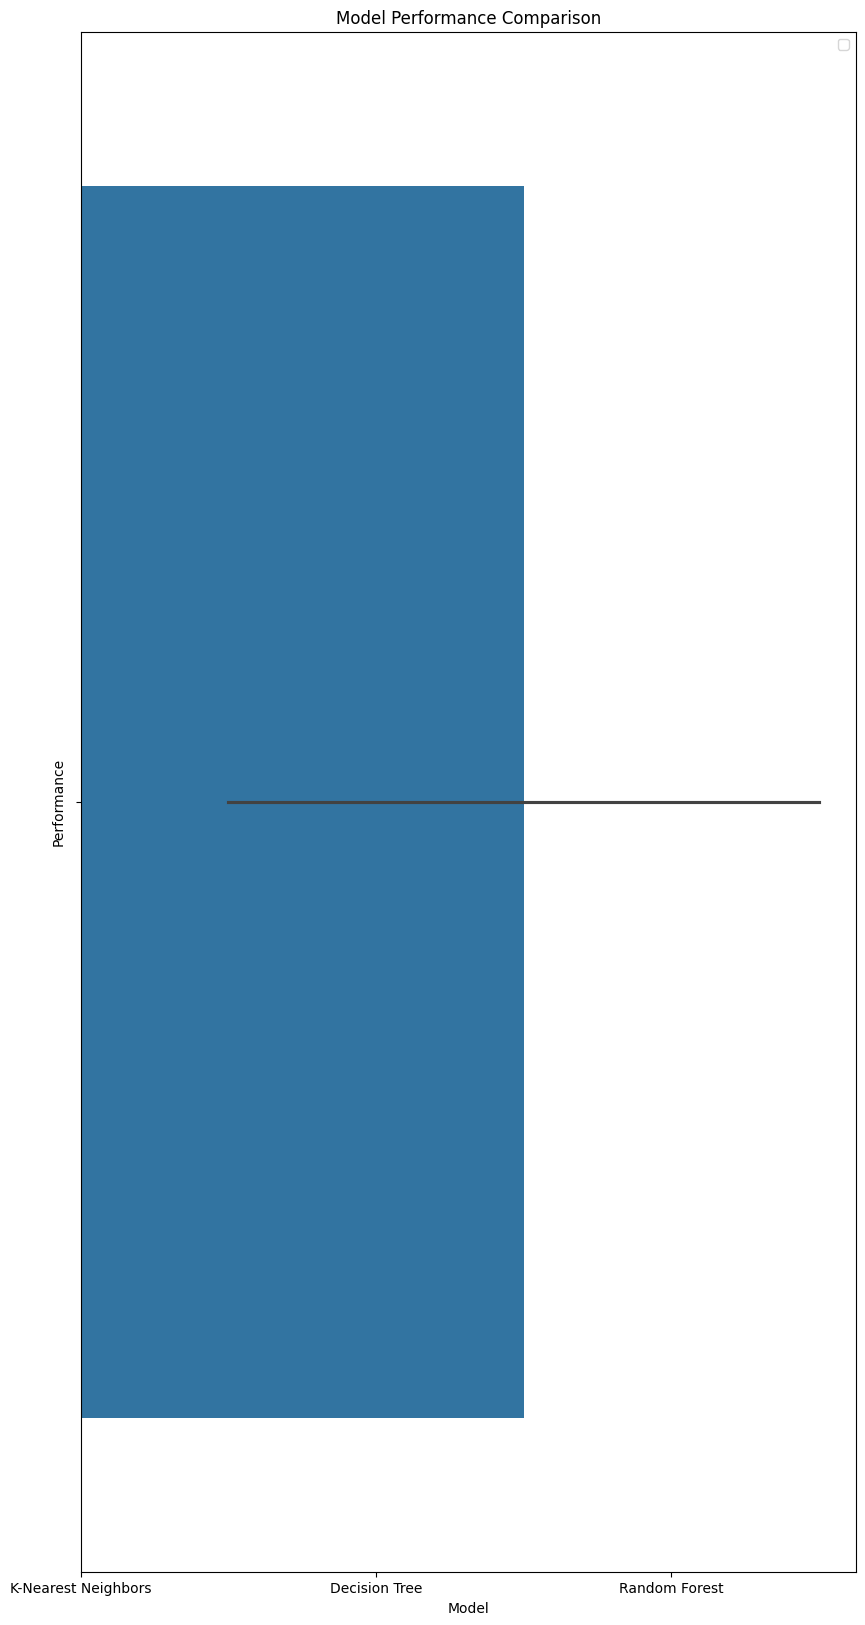

In [40]:
from sklearn.metrics import accuracy_score

model_results = []

def evaluate_model(model, X_test, y_test, model_name):
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred, output_dict=True)
  model_results.append({
      'Model': model_name,
      'Accuracy': accuracy,
      'Precision': report['weighted avg']['precision'],
      'Recall': report['weighted avg']['recall'],
      'F1-score': report['weighted avg']['f1-score']
  })


evaluate_model(grid, X_test, y_test, 'K-Nearest Neighbors')

evaluate_model(grid_dt, X_test, y_test, 'Decision Tree')

evaluate_model(grid_rf, X_test, y_test, 'Random Forest')

evaluate_model(grid_nb, X_test, y_test, 'Naive Bayes')

#evaluate_model(grid_svm, X_test, y_test, 'Support Vector Machine')


# Create a Pandas DataFrame from the model_results list
results_df = pd.DataFrame(model_results)

# Display the table
print(results_df)

plt.figure(figsize=(10, 20))
sns.barplot(x='Model', data=results_df)
plt.title('Model Performance Comparison')
plt.ylabel('Performance')
plt.legend()
plt.show()

In conclusion, based on the given chart and table depicting the performance of the model, it is safe to say that Random Forest have the higest accuracy, while also is the most time-consuming model to train.